In [31]:
import numpy as np
import pandas as pd
import matplotlib
print(matplotlib.__version__)
matplotlib.use('PDF')
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib.lines as mlines
from glob import glob
from collections import Counter
import math
import scipy
#from scipy import stats
import matplotlib.cm as cm
import matplotlib as mpl
import random
from random import shuffle

import ns
import history_cmc as hic
import gw_ecc_calc as gwcalc
import unit_convert as uc
import merger_rate_calculator as mr



%matplotlib inline
%config InlineBackend.figure_format = 'retina'

matplotlib.rcParams.update({'font.size': 22})
rc = {"font.family" : "serif", 
      "mathtext.fontset" : "stix"}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
      
twopi=2.*np.pi
yearsc=3.1557*10**7
figsave='/projects/b1095/syr904/projects/SGRB'
Kconst=9.87*10**-48 ##yr/G^2
Gconst=6.674*10**-8 ##cm3*g-1*s-2
clight=3*10**10 ##cm/s
Msun=2*10**33 ##gram
AU=1.496*10**13  ##cm
PC=3.086*10**18  ##cm

savepath='/projects/b1095/syr904/projects/SGRB/'

2.1.2


/software/anaconda3.6/lib/python3.6/site-packages/ipykernel/__main__.py:5: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/software/anaconda3.6/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/software/anaconda3.6/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/software/anaconda3.6/lib/python3.6/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/software/anaconda3.6/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/software/anaconda3.6/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 474, in start
    iolo

[86.02291310574887, 2756.1447314707148, 1672.1522638972469, 310.29173109807061, 472.10941419368692, 37.388495498479685, 1461953.1232791427, 398409.23162313626, 8918567.537329942, 25512263.704686429, 14164298.171012683, 1620661.5200010615, 48954.207106211594, 470779246.04779941, 587.34386453057107, 76.653363216444077, 305.81321669000397, 221.46476588682361, 1073831.3138730293]


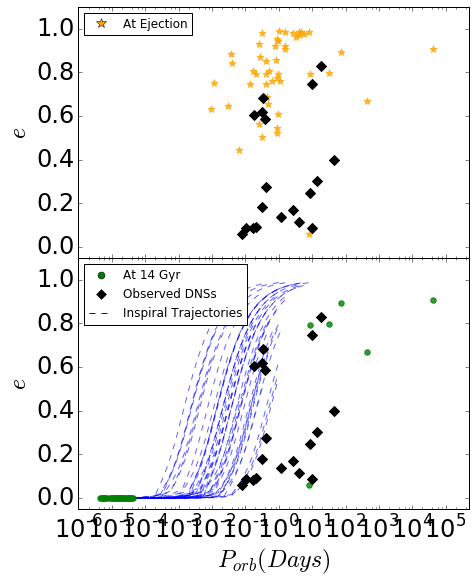

In [3]:
###Plot the evolution of the eccentricity and semi-major axis of the escaped binary NSs
data_dns=np.genfromtxt('/projects/b1095/syr904/projects/SGRB/newruns/data_set_1/Esc_DNS_new.dat')
m0=data_dns[:,4]; m1=data_dns[:,5]; semimajor=data_dns[:,8]; ecc=data_dns[:,9]
t_esc=np.array(data_dns[:,2]); t_inspiral=np.array(data_dns[:,3])
ttot=t_esc+t_inspiral  ##in Myr
t_evolv=14000.-t_esc ##in Myr
#print t_evolv, t_esc, t_inspiral

dataobs=np.genfromtxt('/projects/b1095/syr904/projects/SGRB/allobs_DNS.dat')
Pobs=dataobs[:,1]; eobs=dataobs[:,2]; m0obs=dataobs[:,6]; m1obs=dataobs[:,7]

##Calculate the inspiral time of observed DNSs
tobs_insp=[]; aobs=[]
for i in range(len(Pobs)):
    aobs.append(unit_convert.period_to_au(Pobs[i], m0obs[i], m1obs[i]))
    tobs=t_inspiral=gwcalc.t_inspiral_2(aobs[i], eobs[i], m0obs[i], m1obs[i], 0, 0, 0, 1100)/10**6 ##in Myr
    tobs_insp.append(tobs)

print tobs_insp


##Change the observed periods to sma
#ag=[]; eg=[]; m0g=[]; m1g=[]
#for k in range(len(Pobs)):
#    if m0obs[k]>0:
#        ag.append(unit_convert.period_to_au(Pobs[k], m0obs[k], m1obs[k]))
#        eg.append(eobs[k]); m0g.append(m0obs[k]); m1g.append(m1obs[k])


##Change the model sma to periods in days
Pm=[]
for k in range(len(semimajor)):
    Pm.append(unit_convert.au_to_period(semimajor[k], m0[k], m1[k]))
    
    
##Make signs for legends
rdot=mlines.Line2D([], [],  linestyle = 'None', color='r', marker='o',
                  markersize=7, label='At 14 Gyr')
ystar=mlines.Line2D([], [],  linestyle = 'None', color='orange', marker='*',
                  markersize=10, label='At Ejection')
kdot=mlines.Line2D([], [],  linestyle = 'None', color='k', marker='D',
                  markersize=7, label='Observed DNSs')
gdot=mlines.Line2D([], [],  linestyle = 'None', color='g', marker='o',
                  markersize=7, label='At 14 Gyr')
bline=mlines.Line2D([], [],  linestyle = '--', color='b', label='Inspiral Trajectories')


##Plotting
plt.rcParams['figure.figsize'] = [7, 9]

fig, (ax1, ax2)=plt.subplots(nrows=2, sharex=True)
fig.subplots_adjust(hspace=0)
for i in range(len(m0)):
    P=[]
    if ttot[i]<=14000.:
        t, a, e=gwcalc.t_inspiral_2(semimajor[i], ecc[i], m0[i], m1[i], 0, 1, 0, 1100)
        for j in range(len(a)):     
            P.append(unit_convert.au_to_period(a[j], m0[i], m1[i]))
        ax2.plot(P,e, color='b', lw=1.0, ls='--', zorder=1, alpha=0.6)
        ax2.scatter(P[-1], e[-1], color='green', s=30, marker='o', alpha=0.8, zorder=2)
    else:
        t, a, e=gwcalc.t_inspiral_2(semimajor[i], ecc[i], m0[i], m1[i], t_evolv[i]*10**6, 1, 0, 1100)
        for j in range(len(a)):     
            P.append(unit_convert.au_to_period(a[j], m0[i], m1[i]))
        ax2.plot(P,e, color='b', ls='--', lw=1.0, zorder=1, alpha=0.6)
        ax2.scatter(P[-1], e[-1], color='green', s=30, marker='o', alpha=0.8, zorder=2)
    
    #print i
    

ax1.scatter(Pm, ecc, color='orange', s=50, marker='*', alpha=0.8,zorder=2)
ax1.scatter(Pobs, eobs, color='k', marker='D', s=50, zorder=3)
ax2.scatter(Pobs, eobs, color='k', marker='D', s=50, zorder=3)
ax1.set_ylabel(r'$e$')
ax1.set_ylim(-0.05, 1.1)
ax2.set_xlabel(r'$P_{orb}(Days)$')
ax2.set_ylabel(r'$e$')
ax2.set_xscale('log')
ax2.set_xlim(10**-6, 5*10**5)
ax2.set_ylim(-0.05, 1.1)

ax1.legend(handles=[ystar], loc='upper left', prop={'size': 12}, numpoints=1, frameon=True)
ax2.legend(handles=[gdot, kdot, bline], loc='upper left', prop={'size': 12}, numpoints=1, frameon=True)
#plt.savefig(savepath+'newruns/plots/ae_evolv_alldns.pdf', dpi=300, bbox_inches='tight')

[86.02291310574887, 2756.1447314707148, 1672.1522638972469, 310.29173109807061, 472.10941419368692, 37.388495498479685, 1461953.1232791427, 398409.23162313626, 8918567.537329942, 25512263.704686429, 14164298.171012683, 1620661.5200010615, 48954.207106211594, 470779246.04779941, 587.34386453057107, 76.653363216444077, 305.81321669000397, 221.46476588682361, 1073831.3138730293]


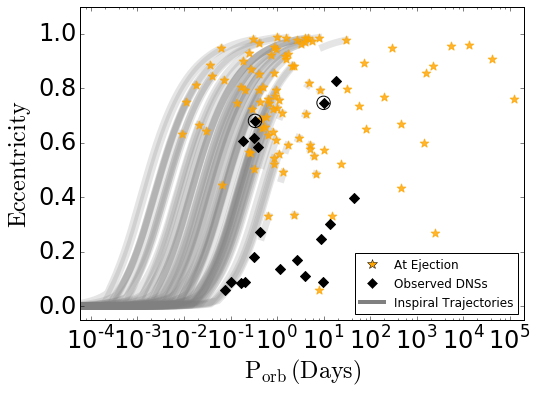

In [10]:
###Plot the evolution of the eccentricity and semi-major axis of the escaped binary NSs
data_dns=np.genfromtxt('/projects/b1095/syr904/projects/SGRB/newruns/finaldata/Esc_DNS_maingrid_v2.dat')
m0=data_dns[:,4]; m1=data_dns[:,5]; semimajor=data_dns[:,8]; ecc=data_dns[:,9]
t_esc=np.array(data_dns[:,2]); t_inspiral=np.array(data_dns[:,3])
ttot=t_esc+t_inspiral  ##in Myr
t_evolv=14000.-t_esc ##in Myr
#print t_evolv, t_esc, t_inspiral

dataobs=np.genfromtxt('/projects/b1095/syr904/projects/SGRB/allobs_DNS.dat')
Pobs=dataobs[:,1]; eobs=dataobs[:,2]; m0obs=dataobs[:,6]; m1obs=dataobs[:,7]

##Calculate the inspiral time of observed DNSs
tobs_insp=[]; aobs=[]
for i in range(len(Pobs)):
    aobs.append(unit_convert.period_to_au(Pobs[i], m0obs[i], m1obs[i]))
    tobs=t_inspiral=gwcalc.t_inspiral_2(aobs[i], eobs[i], m0obs[i], m1obs[i], 0, 0, 0, 1100)/10**6 ##in Myr
    tobs_insp.append(tobs)

print tobs_insp


##Change the observed periods to sma
#ag=[]; eg=[]; m0g=[]; m1g=[]
#for k in range(len(Pobs)):
#    if m0obs[k]>0:
#        ag.append(unit_convert.period_to_au(Pobs[k], m0obs[k], m1obs[k]))
#        eg.append(eobs[k]); m0g.append(m0obs[k]); m1g.append(m1obs[k])


##Change the model sma to periods in days
Pm=[]
for k in range(len(semimajor)):
    Pm.append(unit_convert.au_to_period(semimajor[k], m0[k], m1[k]))
    
    
##Make signs for legends
rdot=mlines.Line2D([], [],  linestyle = 'None', color='r', marker='o',
                  markersize=7, label='At 14 Gyr')
ystar=mlines.Line2D([], [],  linestyle = 'None', color='orange', marker='*',
                  markersize=10, label='At Ejection')
kdot=mlines.Line2D([], [],  linestyle = 'None', color='k', marker='D',
                  markersize=7, label='Observed DNSs')
gdot=mlines.Line2D([], [],  linestyle = 'None', color='g', marker='o',
                  markersize=7, label='At 14 Gyr')
gline=mlines.Line2D([], [],  linestyle = '-', linewidth=4.0, color='grey', label='Inspiral Trajectories')


##Plotting
plt.rcParams['figure.figsize'] = [8, 6]

fig, ax=plt.subplots(nrows=1, sharex=True)
#fig.subplots_adjust(hspace=0)
for i in range(len(m0)):
    P=[]
    if ttot[i]<=14000.:
        t, a, e=gwcalc.t_inspiral_2(semimajor[i], ecc[i], m0[i], m1[i], 0, 1, 0, 1100)
        for j in range(len(a)):     
            P.append(unit_convert.au_to_period(a[j], m0[i], m1[i]))
        ax.plot(P,e, color='grey', lw=7.0, ls='-', zorder=1, alpha=0.2)
        #ax.scatter(P[-1], e[-1], color='green', s=30, marker='o', alpha=0.8, zorder=2)
    else:
        t, a, e=gwcalc.t_inspiral_2(semimajor[i], ecc[i], m0[i], m1[i], t_evolv[i]*10**6, 1, 0, 1100)
        for j in range(len(a)):     
            P.append(unit_convert.au_to_period(a[j], m0[i], m1[i]))
        ax.plot(P,e, color='grey', ls='-', lw=7.0, zorder=1, alpha=0.2)
        #ax.scatter(P[-1], e[-1], color='green', s=30, marker='o', alpha=0.8, zorder=2)
    
    #print i

ax.scatter(Pobs[-1], eobs[-1], color='k', marker='o', facecolor='None', s=180, zorder=3)
ax.scatter(Pobs[-2], eobs[-2], color='k', marker='o', facecolor='None', s=180, zorder=3)
    
ax.scatter(Pobs, eobs, color='k', marker='D', s=50, zorder=3)
ax.scatter(Pm, ecc, color='orange', s=80, marker='*', alpha=0.8,zorder=2)
ax.set_ylabel(r'$e$')
ax.set_ylim(-0.05, 1.1)
ax.set_xlabel(r'$\rm{P_{orb}\,(Days)}$')
ax.set_ylabel(r'$\rm{Eccentricity}$')
ax.set_xscale('log')
ax.set_xlim(6*10**-5, 2*10**5)
ax.set_ylim(-0.05, 1.1)

ax.legend(handles=[ystar, kdot, gline], loc='lower right', prop={'size': 12}, numpoints=1, frameon=True)

fig.tight_layout()
plt.savefig(savepath+'newruns/plots/ae_alldns.pdf', dpi=300, bbox_inches='tight')

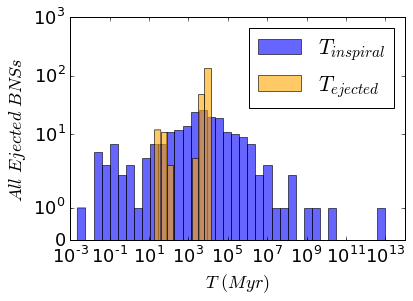

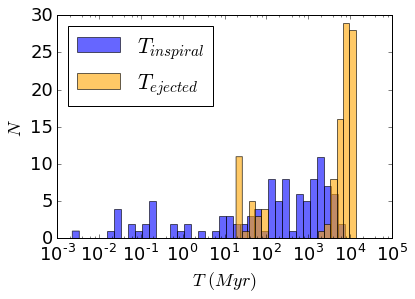

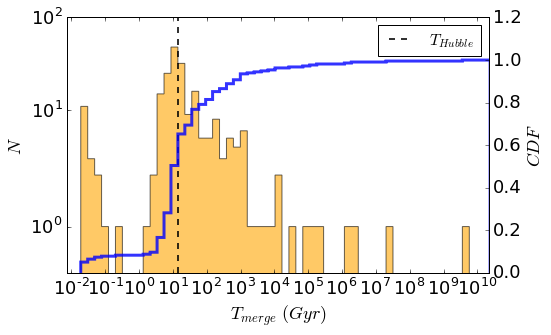

In [96]:
##Plot the distribution of the inspiral time of the escaped BNSs
datanum_all=np.genfromtxt('/projects/b1011/syr904/projects/SGRB/extrememodels/Escbns.dat')
t_inspiral_all=np.array(datanum_all[:,3]); t_esc_all=np.array(datanum_all[:,2])

datanum_merge=np.genfromtxt('/projects/b1011/syr904/projects/SGRB/extrememodels/Escmerger.dat')
t_inspiral_merge=np.array(datanum_merge[:,3]); t_esc_merge=np.array(datanum_merge[:,2])

ttot_all=t_inspiral_all+t_esc_all  ##in Myr
ttot_merge=t_inspiral_merge+t_esc_merge  ##in Myr
#print ttot_all/1000.

####Histogram for all the ejected BNSs####
plt.rcParams['figure.figsize'] = [6, 4]

plt.figure()
plt.hist(t_inspiral_all, bins=np.logspace(np.log10(min(t_inspiral_all)),np.log10(max(t_inspiral_all)), 40), 
         alpha=0.6, label=r'$T_{inspiral}$', log=True)
plt.hist(t_esc_all, bins=np.logspace(np.log10(min(t_esc_all)),np.log10(max(t_esc_all)), 10), 
         alpha=0.6, color='orange', label=r'$T_{ejected}$', log=True)
plt.xscale('log')
plt.yscale('symlog')
#plt.xlim(0.0005, 10**16)
plt.xlabel(r'$T\ (Myr)$')
plt.ylabel(r'$All\ Ejected\ BNSs$')
#plt.tight_layout()
plt.legend(loc='upper right')

plt.savefig(savepath+'times_hist_allbns.pdf', dpi=300, bbox_inches='tight')


####Histogram for the ejected BNSs that will merge within a Hubble time####
plt.rcParams['figure.figsize'] = [6, 4]

plt.figure()
plt.hist(t_inspiral_merge, bins=np.logspace(np.log10(min(t_inspiral_merge)),np.log10(max(t_inspiral_merge)), 40), 
         alpha=0.6, label=r'$T_{inspiral}$')
plt.hist(t_esc_merge, bins=np.logspace(np.log10(min(t_esc_merge)),np.log10(max(t_esc_merge)), 20), 
         alpha=0.6, color='orange', label=r'$T_{ejected}$')
plt.xscale('log')
#plt.yscale('symlog')
#plt.xlim(0.0005, 5*10**4)
plt.xlabel(r'$T\ (Myr)$')
plt.ylabel(r'$N$')
#plt.tight_layout()
plt.legend(loc='upper left')

plt.savefig(savepath+'times_hist_mergedbns.pdf', dpi=300, bbox_inches='tight')


####CDF for all the ejected BNSs####
plt.rcParams['figure.figsize'] = [8, 5]

fig, ax = plt.subplots(ncols=1)
ax1 = ax.twinx()
ax1.hist(ttot_all/1000., bins=np.logspace(np.log10(min(ttot_all/1000.)),np.log10(max(ttot_all/1000.)), 60), 
         range=(0., max(ttot_all/1000.)), alpha=0.8, cumulative=True, histtype='step', 
         normed=True, lw=3.0)
ax.hist(ttot_all/1000., bins=np.logspace(np.log10(min(ttot_all/1000.)),np.log10(max(ttot_all/1000.)), 60), 
        color='orange', alpha=0.6, histtype='stepfilled')
ax.axvline(x=14., color='k', ls='--', lw=2.0, label=r'$T_{Hubble}$', alpha=0.8)
ax.set_xscale('log')
ax.set_yscale('symlog')
ax.set_xlim(min(ttot_all/1000.)*0.4, max(ttot_all/1000.)*0.9)
ax.set_xlabel(r'$T_{merge}\ (Gyr)$')
ax1.set_ylim(0, 1.2)
ax1.set_ylabel(r'$CDF$')
ax.set_ylabel(r'$N$')
fig.tight_layout()
ax.legend(loc='upper right', prop={'size': 16}, frameon=True)

plt.savefig(savepath+'times_cdf_allbns.pdf', dpi=300, bbox_inches='tight')


In [2]:
##Read the data
esc_dns=np.genfromtxt('/projects/b1095/syr904/projects/SGRB/newruns/finaldata/Esc_DNS_maingrid.dat')
esc_nsbh=np.genfromtxt('/projects/b1095/syr904/projects/SGRB/newruns/finaldata/Esc_NSBH_maingrid.dat')
esc_bbh=np.genfromtxt('/projects/b1095/syr904/projects/SGRB/newruns/finaldata/Esc_BBH_maingrid.dat')

gw_dns=np.genfromtxt('/projects/b1095/syr904/projects/SGRB/newruns/finaldata/GWcap_DNS_maingrid.dat')
gw_nsbh=np.genfromtxt('/projects/b1095/syr904/projects/SGRB/newruns/finaldata/GWcap_NSBH_maingrid.dat')
gw_bbh=np.genfromtxt('/projects/b1095/syr904/projects/SGRB/newruns/finaldata/GWcap_BBH_maingrid.dat')

in_dns=np.genfromtxt('/projects/b1095/syr904/projects/SGRB/newruns/finaldata/Incluster_DNS_maingrid.dat')
in_nsbh=np.genfromtxt('/projects/b1095/syr904/projects/SGRB/newruns/finaldata/Incluster_NSBH_maingrid.dat')
in_bbh=np.genfromtxt('/projects/b1095/syr904/projects/SGRB/newruns/finaldata/Incluster_BBH_maingrid.dat')


#Digitized data from Belczynski et al. 2006
digidata_dns=np.genfromtxt('/projects/b1095/syr904/projects/SGRB/newruns/digitized_data_dns.csv', delimiter=',')
digix=np.array(digidata_dns[:,0])/1000.; digiy=np.array(digidata_dns[:,1])

##SGRB data
datasgrb=np.genfromtxt('/projects/b1095/syr904/projects/SGRB/SGRB_redshift.dat')
z_sgrb=datasgrb[:,1][datasgrb[:,1]>=0]

##All time in Myr
tesc_dns=np.array(esc_dns[:,2]); tesc_insp_dns=np.array(esc_dns[:,3]); tesc_fm_dns=np.array(esc_dns[:,10])
tesc_merger_dns=tesc_insp_dns# + tesc_dns
priflag_esc_dns=esc_dns[:,11]

tesc_nsbh=np.array(esc_nsbh[:,2]); tesc_insp_nsbh=np.array(esc_nsbh[:,3]); tesc_fm_nsbh=np.array(esc_nsbh[:,10])
tesc_merger_nsbh=tesc_insp_nsbh# + tesc_nsbh
priflag_esc_nsbh=esc_nsbh[:,11]

tin_merger_dns=np.array(in_dns[:,2]); tin_fm_dns=np.array(in_dns[:,10])
tin_merger_dns=tin_merger_dns -tin_fm_dns
priflag_in_dns=in_dns[:,11]

tin_merger_nsbh=np.array(in_nsbh[:,2]); tin_fm_nsbh=np.array(in_nsbh[:,10])
tin_merger_nsbh=tin_merger_nsbh -tin_fm_nsbh
priflag_in_nsbh=in_nsbh[:,11]

#tgw_merger_dns=[]; tgw_merger_nsbh=[]
tgw_merger_dns=np.array(gw_dns[:,2]); tgw_merger_nsbh=np.array(gw_nsbh[:,2])

In [3]:
##Divide the systems into different groups
tpri_esc_dns=[]; tdyn_esc_dns=[]
tpri_esc_nsbh=[]; tdyn_esc_nsbh=[]

tpri_in_dns=[]; tdyn_in_dns=[]
tpri_in_nsbh=[]; tdyn_in_nsbh=[]

for i in range(len(priflag_esc_dns)):
    if priflag_esc_dns[i]==1:
        tpri_esc_dns.append(tesc_merger_dns[i])
    else:
        tdyn_esc_dns.append(tesc_merger_dns[i])
        
for j in range(len(priflag_esc_nsbh)):
    if priflag_esc_nsbh[j]==1:
        tpri_esc_nsbh.append(tesc_merger_nsbh[j])
    else:
        tdyn_esc_nsbh.append(tesc_merger_nsbh[j])
        
for k in range(len(priflag_in_nsbh)):
    if priflag_in_nsbh[k]==1:
        tpri_in_nsbh.append(tin_merger_nsbh[k])
    else:
        tdyn_in_nsbh.append(tin_merger_nsbh[k])
        
for l in range(len(priflag_in_dns)):
    if priflag_in_dns[l]==1:
        tpri_in_dns.append(tin_merger_dns[l])
    else:
        tdyn_in_dns.append(tin_merger_dns[l])

        
tdyn_all_dns=np.concatenate((tdyn_esc_dns, tdyn_in_dns, tgw_merger_dns), axis=None)
tdyn_all_dns=tdyn_all_dns/1000.  ##in Gyr

tdyn_all_nsbh=np.concatenate((tdyn_esc_nsbh, tdyn_in_nsbh, tgw_merger_nsbh), axis=None)
tdyn_all_nsbh=tdyn_all_nsbh/1000.

tpri_all_dns=np.concatenate((tpri_esc_dns, tpri_in_dns), axis=None)
tpri_all_dns=tpri_all_dns/1000.

tpri_all_nsbh=np.concatenate((tpri_esc_nsbh, tpri_in_nsbh), axis=None)
tpri_all_nsbh=tpri_all_nsbh/1000.

tpri_all_nsbh=np.delete(tpri_all_nsbh, -1)
print(tdyn_all_dns, tdyn_all_nsbh, tpri_all_dns, tpri_all_nsbh)

[6.90283389e+07 3.78511769e+04 1.10719494e+08 3.57388000e-04
 1.73242766e+00 2.22416260e+08 1.50232032e+03 2.18016724e+09
 2.66475831e+06 4.03265039e+10 8.30102591e+13 2.09216885e+01
 6.18558729e-01 4.14278142e+02 1.01994476e-01 1.43154656e+05
 1.63716421e+02 2.74801515e+03 7.34480628e+02 7.53300000e-06
 1.21208036e-01 6.97569593e+04 4.22561510e+00 7.41867572e+05
 1.55436367e+08 9.55729826e+08 3.60439928e+01 2.32936995e-01
 1.08216072e+16 2.27973223e+11 1.27073073e+04 1.68231440e+04
 4.77200376e+09 8.71127394e+00 2.44609877e+08 1.10480643e+01
 1.85103989e+00 2.57606861e+02 2.13393964e+00 6.02549007e+03
 1.31390762e+02 6.85988627e+00 3.72331356e+01 5.11808364e+03
 6.13986508e+04 5.00996068e+02 1.66882590e-02 4.61196200e-02
 1.24680000e-05 2.03448300e-03 1.16560105e-01 1.08820910e-02
 4.58930000e-05 1.78574000e-04 2.11474400e-03 9.80359320e+00
 9.87477609e+00 1.05131351e+01] [4.17569542e-01 4.27684109e+00 8.63171296e+00 3.33547204e+00
 7.16142899e+15 3.05145677e+07 5.06372161e+00 3.23146

unit_convert.py:76: RuntimeWarning: overflow encountered in sinh
  Z=pow(np.sinh(t/A)/B, -2./3.)-1


['#CA0020', '#F4A582', '#92C5DE', '#0571B0']


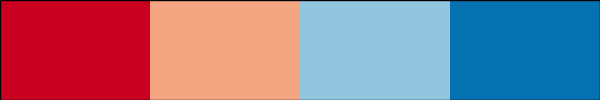

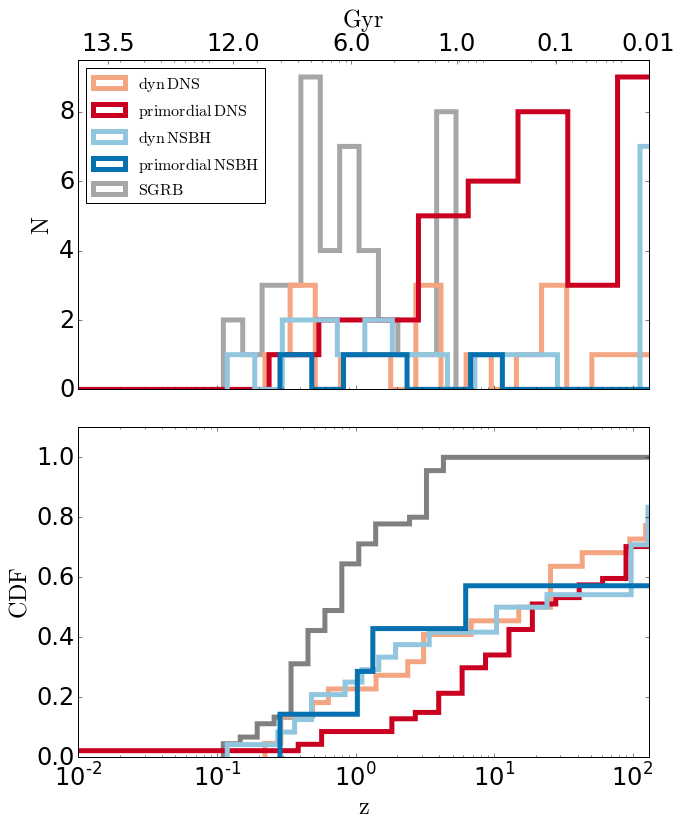

In [5]:
##Convert the merger time (from zero-age cluster to merger) to resshifts
#print tdyn_all_dns, tpri_all_dns

zdyn_all_dns=unit_convert.ttoredshift(tdyn_all_dns)     
zdyn_all_nsbh=unit_convert.ttoredshift(tdyn_all_nsbh)
zpri_all_dns=unit_convert.ttoredshift(tpri_all_dns)
zpri_all_nsbh=unit_convert.ttoredshift(tpri_all_nsbh)

#print zdyn_all_dns, zdyn_all_nsbh, zpri_all_dns, zpri_all_nsbh

zdyn_all_dns=zdyn_all_dns[zdyn_all_dns>=0]
zdyn_all_nsbh=zdyn_all_nsbh[zdyn_all_nsbh>=0]
zpri_all_dns=zpri_all_dns[zpri_all_dns>=0]
zpri_all_nsbh=zpri_all_nsbh[zpri_all_nsbh>=0]

#print zdyn_all_dns, zdyn_all_nsbh, zpri_all_dns, zpri_all_nsbh

##Make the weights for the histogram
maxlenz=max(len(zdyn_all_dns), len(zdyn_all_nsbh), len(zpri_all_dns), len(zpri_all_nsbh))
zdyn_dns=np.pad(zdyn_all_dns, (0, maxlenz-len(zdyn_all_dns)), 'constant')
zpri_dns=np.pad(zpri_all_dns, (0, maxlenz-len(zpri_all_dns)), 'constant')
zdyn_nsbh=np.pad(zdyn_all_nsbh, (0, maxlenz-len(zdyn_all_nsbh)), 'constant')
zpri_nsbh=np.pad(zpri_all_nsbh, (0, maxlenz-len(zpri_all_nsbh)), 'constant')
zsgrb=np.pad(z_sgrb, (0, maxlenz-len(z_sgrb)), 'constant')

zweights_dyn_dns= np.ones_like(zdyn_dns)/float(len(zdyn_dns))
zweights_pri_dns= np.ones_like(zpri_dns)/float(len(zpri_dns))
zweights_dyn_nsbh= np.ones_like(zdyn_nsbh)/float(len(zdyn_nsbh))
zweights_pri_nsbh= np.ones_like(zpri_nsbh)/float(len(zpri_nsbh))
zweights_sgrb= np.ones_like(zsgrb)/float(len(zsgrb))


##Plot the distribution of the mergers in reshifts
import palettable
from palettable.colorbrewer.diverging import RdBu_4
print RdBu_4.hex_colors
RdBu_4.show_discrete_image()
cs=RdBu_4.hex_colors
matplotlib.rcParams.update({'font.size': 24})

plt.rcParams['figure.figsize'] = [10, 12]

fig, (ax, ax1) = plt.subplots(nrows=2,sharex=True)
fig.subplots_adjust(hspace=0)
ax2 = ax.twiny()
#new_tick_locations = np.array([0.01, 0.1, 1., 10., 100.])
#new_tick_labels = np.array([13.58, 12.41, 5.90, 0.48, 0.017])
new_tick_locations = np.array([1.63898334e-02,   1.35015371e-01,   9.77770791e-01, 5.73832400e+00,   3.03045312e+01,   1.44304063e+02])
new_tick_labels = np.array([13.5, 12., 6., 1., 0.1, 0.01])

lws=5.0

##Plot the cumulative histograms
ax1.hist(zdyn_dns, bins=np.logspace(np.log10(min(zdyn_all_dns)),np.log10(max(zpri_all_nsbh)), 40), 
         range=(0., 10.), alpha=1.0, cumulative=True, histtype='step',
         lw=lws, color=cs[1], weights=zweights_dyn_dns, normed=True, zorder=2)
ax1.hist(zpri_dns, bins=np.logspace(np.log10(min(zpri_all_dns)),np.log10(max(zpri_all_nsbh)), 40), 
         range=(0., 10.), alpha=1.0, cumulative=True, histtype='step',
         lw=lws, color=cs[0], weights=zweights_pri_dns, normed=True, zorder=2)
ax1.hist(zdyn_nsbh, bins=np.logspace(np.log10(min(zdyn_all_nsbh)),np.log10(max(zpri_all_nsbh)), 40), 
         range=(0., 10.), alpha=1.0, cumulative=True, histtype='step',
         lw=lws, color=cs[2], weights=zweights_dyn_nsbh, normed=True, zorder=2)
ax1.hist(zpri_nsbh, bins=np.logspace(np.log10(min(zpri_all_nsbh)),np.log10(max(zpri_all_nsbh)), 40), 
         range=(0., 10.), alpha=1.0, cumulative=True, histtype='step',
         lw=lws, color=cs[3], weights=zweights_pri_nsbh, normed=True, zorder=2)
ax1.hist(zsgrb, bins=np.logspace(np.log10(min(z_sgrb)),np.log10(max(zpri_all_nsbh)), 40), 
         range=(0., 10.), alpha=1.0, cumulative=True, histtype='step',
         lw=lws, color='grey', weights=zweights_sgrb, normed=True, zorder=1)

##Plot the histograms
ax.hist(zdyn_all_dns, bins=np.logspace(np.log10(min(zdyn_all_dns)),np.log10(max(zdyn_all_dns)), 28), 
        color=cs[1], alpha=1.0, edgecolor=cs[1], lw=lws, histtype='step', label=r'$\rm{dyn\, DNS}$', zorder=2)
ax.hist(zpri_all_dns, bins=np.logspace(np.log10(min(zpri_all_dns)),np.log10(max(zpri_all_dns)), 20), 
        color=cs[0], alpha=1.0, edgecolor=cs[0], lw=lws, histtype='step', label=r'$\rm{primordial\, DNS}$', zorder=2)
ax.hist(zdyn_all_nsbh, bins=np.logspace(np.log10(min(zdyn_all_nsbh)),np.log10(max(zdyn_all_nsbh)), 28), 
        color=cs[2], alpha=1.0, edgecolor=cs[2], lw=lws, histtype='step', label=r'$\rm{dyn\, NSBH}$', zorder=2)
ax.hist(zpri_all_nsbh, bins=np.logspace(np.log10(min(zpri_all_nsbh)),np.log10(max(zpri_all_nsbh)), 20), 
        color=cs[3], alpha=1.0, edgecolor=cs[3], lw=lws, histtype='step', label=r'$\rm{primordial\, NSBH}$', zorder=2)
ax.hist(z_sgrb, bins=np.logspace(np.log10(min(z_sgrb)),np.log10(max(z_sgrb)), 13), 
        color='grey', alpha=0.7, lw=lws, histtype='step', label=r'$\rm{SGRB}$', zorder=1)


#ax.axvline(x=14., color='k', ls='--', lw=2.0, label='Hubble Time', alpha=0.8)
#ax1.axvline(x=14., color='k', ls='--', lw=2.0, label='Hubble Time', alpha=0.8)


ax1.set_xlim(0.01, 130.)
ax1.set_ylim(0, 1.1)
ax1.set_ylabel(r'$\rm{CDF}$')
ax1.set_xscale('log')


ax.set_xscale('log')
#ax.set_yscale('symlog')
#ax.set_xlim(min(tesc_merger_dns/1000.)*0.8, max(tesc_merger_dns/1000.)*0.9)
ax.set_ylim(0., 9.5)
ax.set_xlim(0.01, 130.)
ax1.set_xlabel(r'$\rm{z}$')
ax.set_ylabel(r'$\rm{N}$')

ax2.set_xscale('log')
ax2.set_xlim(ax.get_xlim())
ax2.set_xticks(new_tick_locations)
ax2.set_xticklabels(new_tick_labels)
ax2.set_xlabel(r'$\rm{Gyr}$')

fig.tight_layout()
ax.legend(loc='upper left', prop={'size': 16}, frameon=True)

#plt.savefig(savepath+'newruns/plots/tmerger_redshift.pdf', dpi=300)

['#CA0020', '#F4A582', '#92C5DE', '#0571B0']


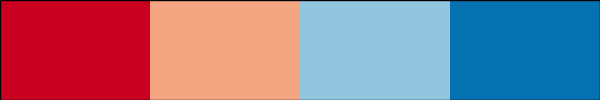

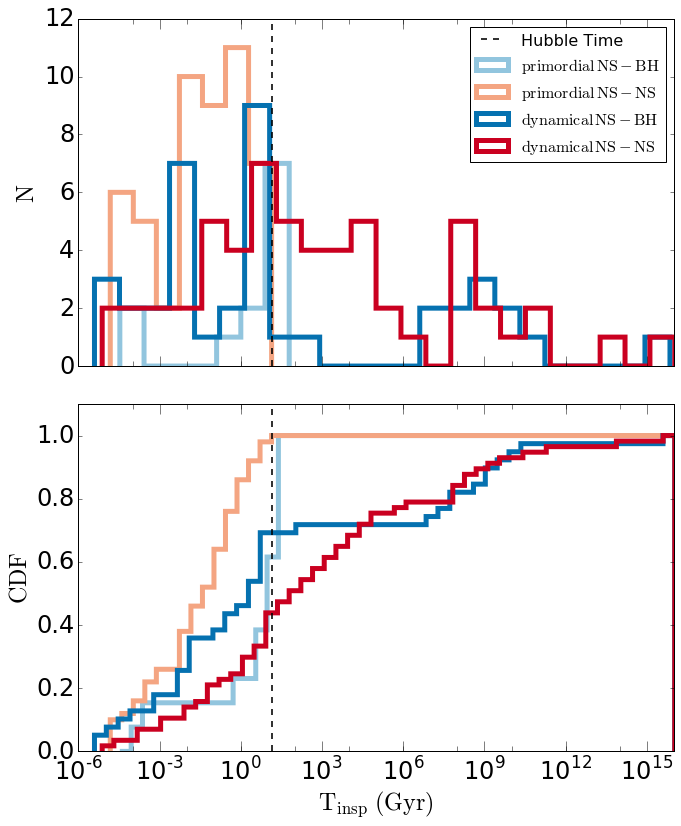

In [7]:
##Plot the distribution of the inspiral time (Tmerger=Tformation to Tmerge)

##Get the maximum of the length of the lists
maxlen=max(len(tdyn_all_dns), len(tdyn_all_nsbh), len(tpri_all_dns), len(tpri_all_nsbh))


##Make the weights for the histogram
dyn_dns=np.pad(tdyn_all_dns, (0, maxlen-len(tdyn_all_dns)), 'constant')
pri_dns=np.pad(tpri_all_dns, (0, maxlen-len(tpri_all_dns)), 'constant')
dyn_nsbh=np.pad(tdyn_all_nsbh, (0, maxlen-len(tdyn_all_nsbh)), 'constant')
pri_nsbh=np.pad(tpri_all_nsbh, (0, maxlen-len(tpri_all_nsbh)), 'constant')

weights_dyn_dns= np.ones_like(dyn_dns)/float(len(dyn_dns))
weights_pri_dns= np.ones_like(pri_dns)/float(len(pri_dns))
weights_dyn_nsbh= np.ones_like(dyn_nsbh)/float(len(dyn_nsbh))
weights_pri_nsbh= np.ones_like(pri_nsbh)/float(len(pri_nsbh))


#Same thing, but only two groups: dns and nsbh.
#tdns_all=np.concatenate((tdyn_all_dns, tpri_all_dns), axis=None)
#tnsbh_all=np.concatenate((tdyn_all_nsbh, tpri_all_nsbh), axis=None)

#maxlen_all=max(len(tdns_all), len(tnsbh_all), len(digix))
#
#dns_all=np.pad(tdns_all, (0, maxlen_all-len(tdns_all)), 'constant')
#nsbh_all=np.pad(tnsbh_all, (0, maxlen_all-len(tnsbh_all)), 'constant')
#digi=np.pad(digix, (0, maxlen_all-len(digix)), 'constant')
#
#weights_dns=np.ones_like(dns_all)/float(len(dns_all))
#weights_nsbh=np.ones_like(nsbh_all)/float(len(nsbh_all))
#weights_digi=np.ones_like(digi)/float(len(digi))


##Weights for the digitized data from Belczynski et al. 2006

import palettable
from palettable.colorbrewer.diverging import RdBu_4
print RdBu_4.hex_colors
RdBu_4.show_discrete_image()
cs=RdBu_4.hex_colors
matplotlib.rcParams.update({'font.size': 24})


plt.rcParams['figure.figsize'] = [10, 12]

fig, (ax, ax1) = plt.subplots(nrows=2,sharex=True)
fig.subplots_adjust(hspace=0)
#ax1 = ax.twinx()

lws=5.0

##Plot the cumulative histograms
ax1.hist(pri_nsbh, bins=np.logspace(np.log10(min(tpri_all_nsbh)),np.log10(max(tdyn_all_dns)), 50), 
         range=(0., 15.), alpha=1., cumulative=True, histtype='step', 
         lw=lws, color=cs[2], weights=weights_pri_nsbh, normed=True)
ax1.hist(pri_dns, bins=np.logspace(np.log10(min(tpri_all_dns)),np.log10(max(tdyn_all_dns)), 50), 
         range=(0., 15.), alpha=1., cumulative=True, histtype='step', 
         lw=lws, color=cs[1],weights=weights_pri_dns, normed=True)
ax1.hist(dyn_nsbh, bins=np.logspace(np.log10(min(tdyn_all_nsbh)),np.log10(max(tdyn_all_dns)), 50), 
         range=(0., 15.), alpha=1., cumulative=True, histtype='step', 
         lw=lws, color=cs[3], weights=weights_dyn_nsbh, normed=True)
ax1.hist(dyn_dns, bins=np.logspace(np.log10(min(tdyn_all_dns)),np.log10(max(tdyn_all_dns)), 50), 
         range=(0., 15), alpha=1., cumulative=True, histtype='step', 
         lw=lws, color=cs[0], weights=weights_dyn_dns, normed=True)


##Plot the histograms
ax.hist(tpri_all_nsbh, bins=np.logspace(np.log10(min(tpri_all_nsbh)),np.log10(max(tpri_all_nsbh)), 8), 
        color=cs[2], alpha=1., edgecolor=cs[2], lw=lws, histtype='step', label=r'$\rm{primordial\, NS-BH}$')
ax.hist(tpri_all_dns, bins=np.logspace(np.log10(min(tpri_all_dns)),np.log10(max(tpri_all_dns)),8), 
        color=cs[1], alpha=1., edgecolor=cs[1], lw=lws, histtype='step', label=r'$\rm{primordial\, NS-NS}$')
ax.hist(tdyn_all_nsbh, bins=np.logspace(np.log10(min(tdyn_all_nsbh)),np.log10(max(tdyn_all_nsbh)), 24), 
        color=cs[3], alpha=1., edgecolor=cs[3], lw=lws, histtype='step', label=r'$\rm{dynamical\, NS-BH}$')
ax.hist(tdyn_all_dns, bins=np.logspace(np.log10(min(tdyn_all_dns)),np.log10(max(tdyn_all_dns)), 24), 
        color=cs[0], alpha=1., edgecolor=cs[0], lw=lws, histtype='step', label=r'$\rm{dynamical\, NS-NS}$')



#This is for the dns and nsbh two groups
#ax1.hist(dns_all, bins=np.logspace(np.log10(min(tdns_all)),np.log10(max(tdns_all)), 35), 
#         range=(0., 16.), alpha=0.8, cumulative=True, histtype='step', 
#         lw=2.5, color='red', weights=weights_dns, normed=True)
#ax1.hist(nsbh_all, bins=np.logspace(np.log10(min(tnsbh_all)),np.log10(max(tdns_all)), 33), 
#         range=(0., 16), alpha=0.8, cumulative=True, histtype='step', 
#         lw=2.5, color='blue', weights=weights_dns, normed=True)
#ax.hist(tdns_all, bins=np.logspace(np.log10(min(tdns_all)),np.log10(max(tdns_all)), 35), 
#        color='red', alpha=0.6, edgecolor='red', lw=2.5, histtype='stepfilled', label=r'$\rm{DNS}$')
#ax.hist(tnsbh_all, bins=np.logspace(np.log10(min(tnsbh_all)),np.log10(max(tnsbh_all)), 33), 
#        color='blue', alpha=0.6, edgecolor='blue', lw=2.5, histtype='stepfilled', label=r'$\rm{NSBH}$')
#ax.scatter(digix, digiy*20., color='k', s=20, zorder=2)
#
#
ax.axvline(x=14., color='k', ls='--', lw=2.0, label='Hubble Time', alpha=0.8)
ax1.axvline(x=14., color='k', ls='--', lw=2.0, label='Hubble Time', alpha=0.8)


ax1.set_xlim(0.000001, 10**16.)
ax1.set_ylim(0, 1.1)
ax1.set_ylabel(r'$\rm{CDF}$')
ax1.set_xscale('log')
#ax1.legend(loc='upper left', prop={'size': 16}, frameon=True)


ax.set_xscale('log')
#ax.set_yscale('symlog')
#ax.set_xlim(min(tesc_merger_dns/1000.)*0.8, max(tesc_merger_dns/1000.)*0.9)
#ax.set_ylim(0., 10.)
ax.set_xlim(0.000001, 10**16.)
ax1.set_xlabel(r'$\rm{T_{insp}\ (Gyr)}$')
ax.set_ylabel(r'$\rm{N}$')
ax.legend(loc='upper right', prop={'size': 16}, frameon=True)

plt.locator_params(axis='x', numticks=9)

ax1.tick_params(axis='x', length=10, which='major')
ax1.tick_params(axis='x', length=5, which='minor')
ax.tick_params(axis='x', length=10, which='major')
ax.tick_params(axis='x', length=5, which='minor')

fig.tight_layout()


plt.savefig(savepath+'newruns/plots/tinspiral_v2.pdf', dpi=300, bbox_inches='tight')

/software/anaconda3.6/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


13481.200895
13409.478312
13306.860932
13262.118749
12460.214855
12198.303442
11673.263432
11555.958878
11379.115136
10671.05165
10513.135136
10445.665979
10207.953189
10020.626502
9874.776091
9803.593196
9351.959138
9200.513546
9128.664018
47.776583


KeyboardInterrupt: 

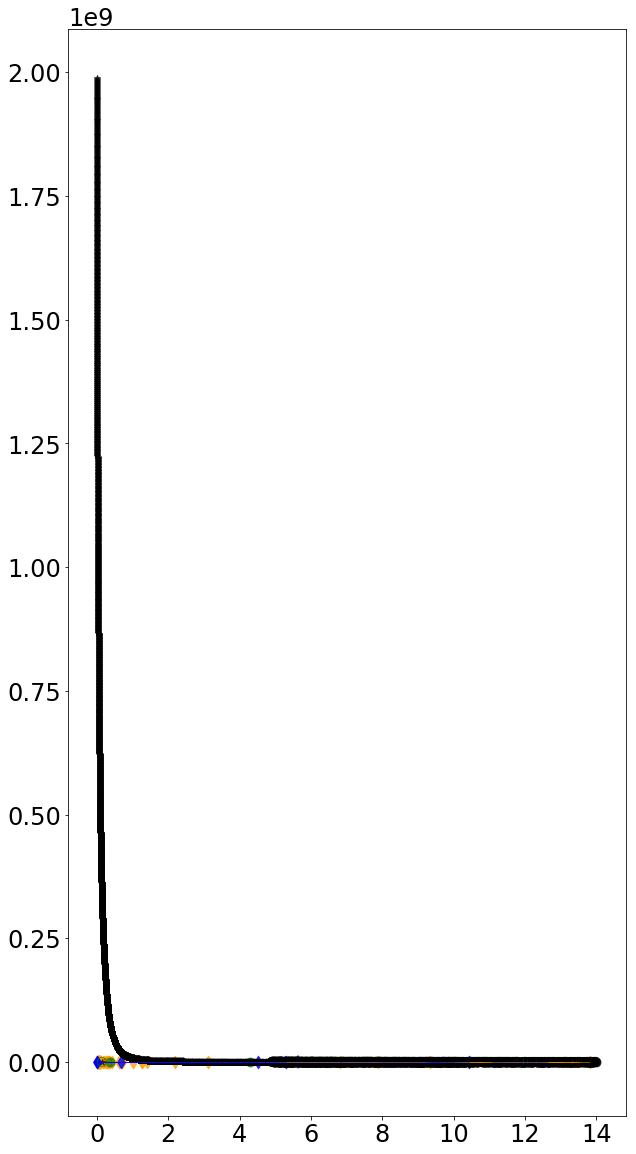

In [4]:
##Plot Chirp mass vs. Time formation order
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)
import matplotlib.gridspec as gridspec


esc_all=[esc_dns, esc_nsbh, esc_bbh]
in_all=[in_dns, in_nsbh, in_bbh]
gw_all=[gw_dns, gw_nsbh, gw_bbh]


list_form=[]; list_merge=[]; list_pb=[]
list_mark=[]     ##Mark the mergers by the merging position: inside or outside
list_mod=[]      ##Model status (dissolved or non-dissolved)
y_len=[]; y_values=[]

st=1
for i in range(3):    
    list_temp_form=list(esc_all[i][:,10])+list(in_all[i][:,10])+list(gw_all[i][:,2])
    list_temp_merge=list(np.add(esc_all[i][:,2], esc_all[i][:,3]))+list(in_all[i][:,2])+list(gw_all[i][:,2])
    list_temp_pb=list(esc_all[i][:,11])+list(in_all[i][:,11])+list(np.zeros(len(gw_all[i][:,2])))
    list_temp_mark=np.concatenate((np.ones(len(esc_all[i])), np.zeros(len(in_all[i])), np.zeros(len(gw_all[i]))), axis=None)
    list_temp_mod=list(esc_all[i][:,-1])+list(in_all[i][:,-1])+list(gw_all[i][:,-1])
    
    list_temp_form_origin=list_temp_form
    
    list_temp_form, list_temp_mark=(list(t) for t in zip(*sorted(zip(list_temp_form_origin,  list_temp_mark), reverse=True)))
    list_temp_form, list_temp_merge=(list(t) for t in zip(*sorted(zip(list_temp_form_origin,  list_temp_merge), reverse=True)))
    list_temp_form, list_temp_pb=(list(t) for t in zip(*sorted(zip(list_temp_form_origin,  list_temp_pb), reverse=True)))
    list_temp_form, list_temp_mod=(list(t) for t in zip(*sorted(zip(list_temp_form_origin, list_temp_mod), reverse=True)))
    
    
    ##Exclude the mergers that happen after a Hubble time
    index_hubble=[j for j, e in enumerate(list_temp_merge) if e > 14000.]
    list_temp_form=np.delete(list_temp_form, index_hubble)
    list_temp_merge=np.delete(list_temp_merge, index_hubble)
    list_temp_pb=np.delete(list_temp_pb, index_hubble)
    list_temp_mark=np.delete(list_temp_mark, index_hubble)
    list_temp_mod=np.delete(list_temp_mod, index_hubble)
    
    
    ##Exclude the mergers that are in the dissolved clusters
    index_dissol=[k for k, e in enumerate(list_temp_mod) if e != 1]
    list_temp_form=np.delete(list_temp_form, index_dissol)
    list_temp_merge=np.delete(list_temp_merge, index_dissol)
    list_temp_pb=np.delete(list_temp_pb, index_dissol)
    list_temp_mark=np.delete(list_temp_mark, index_dissol)
    list_temp_mod=np.delete(list_temp_mod, index_dissol)    
            
    list_form.append(list_temp_form); list_merge.append(list_temp_merge); list_pb.append(list_temp_pb)
    list_mark.append(list_temp_mark); list_mod.append(list_temp_mod)
    
    
    y_len=len(list_form[i])
    
    ed=st+y_len
    
    y_values.append(np.logspace(np.log(st), np.log(ed), num=y_len))
                 
    st=st+y_len+1


##Make signs for legends
kstar=mlines.Line2D([], [],  linestyle = 'None', color='k', marker='*',
                  markersize=10, label='At Formation')
bdiamond=mlines.Line2D([], [],  linestyle = 'None', color='b', marker='d',
                  markersize=7, lw=40.0, label='primordial NS-BH at merger')
ydiamond=mlines.Line2D([], [],  linestyle = 'None', color='orange', marker='d',
                  markersize=7, lw=40.0, label='primordial NS-NS at merger')
kdiamond=mlines.Line2D([], [],  linestyle = 'None', color='gray', marker='d',
                  markersize=7, lw=40.0, label='primordial BH-BH at merger')

gdot=mlines.Line2D([], [],  linestyle = 'None', color='g', marker='o',
                  markersize=7, label='dynamical NS-BH at merger')
rdot=mlines.Line2D([], [],  linestyle = 'None', color='r', marker='o',
                  markersize=7, label='dynamical NS-NS at merger')
graydot=mlines.Line2D([], [],  linestyle = 'None', color='k', marker='o',
                  markersize=7, label='dynamical BH-BH at merger')

bline=mlines.Line2D([], [],  linestyle = '-', color='b', label='NS-BH')
yline=mlines.Line2D([], [],  linestyle = '-', color='orange', label='NS-NS')
kline=mlines.Line2D([], [],  linestyle = '-', color='k', label='BH-BH')
dashline=mlines.Line2D([], [],  linestyle = '--', color='k', label='Hubble Time')



##Plotting
plt.rcParams['figure.figsize'] = [10, 20]   #15, 8
#fig, ax1=plt.subplots(ncols=1)
fig, ax1 = plt.subplots(1,1)
matplotlib.rcParams.update({'font.size': 22})
#grid = plt.GridSpec(1, 2, wspace=0.1, width_ratios=[2, 1],)
#ax1 = fig.add_subplot(grid[:, :-1])
#ax_hist = fig.add_subplot(grid[:-1, -1], sharey=ax1)


cs1=['orange', 'b', 'gray']
cs2=['r', 'g', 'k']

for x in range(3):
    ax1.scatter(np.array(list_form[x])/1000., y_values[x], marker='*', s=40, color='k', alpha=0.6, zorder=1)
    for y in range(len(list_pb[x])):
        if list_pb[x][y]==1 and list_mark[x][y]==1:    ##Primordial binary and merge outside
            ax1.scatter(np.array(list_merge[x][y])/1000., y_values[x][y], marker='d', color=cs1[x], s=80, alpha=0.8, zorder=1)
        
        elif list_pb[x][y]==1 and list_mark[x][y]==0:  ##Primordial binary and merge inside
            ax1.scatter(np.array(list_merge[x][y])/1000., y_values[x][y], marker='d', color=cs1[x], facecolor='None', s=80, alpha=0.8, zorder=2)
        
        elif list_pb[x][y]==0 and list_mark[x][y]==1:  ##Non-primordial binary and merge outside
            ax1.scatter(np.array(list_merge[x][y])/1000., y_values[x][y], color=cs2[x], s=80, alpha=0.7, zorder=1)
            if x==0: print(list_form[x][y])
        
        else:    ##Non-primordial binary and merge inside
            ax1.scatter(np.array(list_merge[x][y])/1000., y_values[x][y], color=cs2[x], facecolor='None', s=80, alpha=0.7, zorder=2)
            if x==0: print(list_form[x][y])
            
        
        
    ax1.hlines(y_values[x], xmin=np.array(list_form[x])/1000., xmax=np.array(list_merge[x])/1000., 
               colors=cs1[x], zorder=3, alpha=0.6, lw=0.8)
    

plt.text(0.1, 0.75, r'$\rm{BH-BH}$', fontsize=25, color='dimgray', transform=ax1.transAxes)
plt.text(0.1, 0.51, r'$\rm{NS-BH}$', fontsize=25, color='b', transform=ax1.transAxes)
plt.text(0.1, 0.3, r'$\rm{NS-NS}$', fontsize=25, color='darkorange', transform=ax1.transAxes)
        

#ax1.set_ylabel(r'$\rm{M_{chirp}}$')
ax1.set_xlabel(r'$\rm{T\, (Gyr)}$')

ax1.set_xlim(0.003, 20.)
ax1.set_ylim(0.6, 5*10**9)

ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.get_yaxis().set_visible(False)

ax1.legend(handles=[kstar, ydiamond, bdiamond, kdiamond, rdot, gdot, graydot], loc='lower left',
           prop={'size': 14}, numpoints=1, frameon=False)

ax1.tick_params(axis='x', length=10, which='major')
ax1.tick_params(axis='x', length=5, which='minor')
#fig.subplots_adjust(wspace=0.15)
#fig.tight_layout()
#plt.savefig(savepath+'newruns/plots/allsystems_order.pdf', dpi=300, bbox_inches='tight')



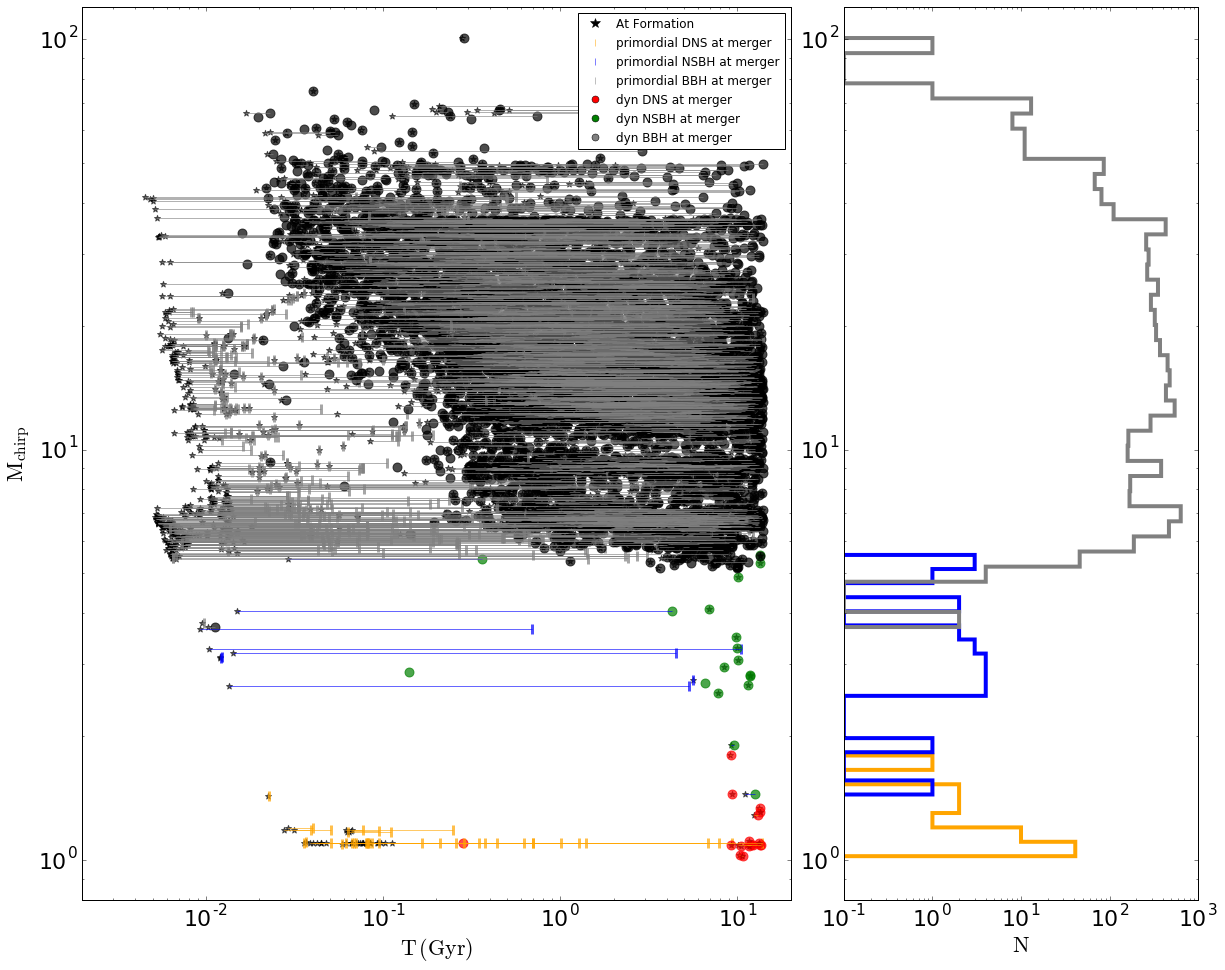

In [18]:
##Plot Chirp mass vs. Time subplots/histogram
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)
import matplotlib.gridspec as gridspec


esc_all=[esc_dns, esc_nsbh, esc_bbh]
in_all=[in_dns, in_nsbh, in_bbh]
gw_all=[gw_dns, gw_nsbh, gw_bbh]
    

##Extract the data
tform_esc=[]; tmerge_esc=[]
m0_esc=[]; m1_esc=[]
priflag_esc=[]

tform_in=[]; tmerge_in=[]
m0_in=[]; m1_in=[]
priflag_in=[]

tcoll_gw=[]
m0_gw=[]; m1_gw=[]; m2_gw=[]; m3_gw=[]

for i in range(3):
    ##For escaped files
    tform_esc.append(esc_all[i][:,10])
    mergertime_esc=np.add(esc_all[i][:,2], esc_all[i][:,3])
    tmerge_esc.append(list(mergertime_esc))
    m0_esc.append(esc_all[i][:,4]); m1_esc.append(esc_all[i][:,5])
    priflag_esc.append(esc_all[i][:,11])
    
    
    ##For in-cluster files
    tform_in.append(in_all[i][:,10])
    tmerge_in.append(in_all[i][:,2])
    m0_in.append(in_all[i][:,7]); m1_in.append(in_all[i][:,8])
    priflag_in.append(in_all[i][:,11])
    
    
    ##For gwcap files
    tcoll_gw.append(gw_all[i][:,2])
    m0_gw.append(gw_all[i][:,10]); m1_gw.append(gw_all[i][:,11]); m2_gw.append(gw_all[i][:,12]); m3_gw.append(gw_all[i][:,13])
    


##Calculate the chirp mass
mc_esc=[]; mc_in=[]; mc_gw=[]
tmerge_gw=[]
m0_coll2_nsbh=[]; m1_coll2_nsbh=[]
for j in range(3):
    ##For escaped files
    chirpmass_esc=unit_convert.chirpmass(m0_esc[j], m1_esc[j])
    mc_esc.append(chirpmass_esc)
    
    ##For in-cluster files
    chirpmass_in=unit_convert.chirpmass(m0_in[j], m1_in[j])
    mc_in.append(chirpmass_in)
    mc_gw_temp=[]; tmerge_gw_temp=[]
    for k in range(len(m0_gw[j])):
        if m2_gw[j][k]==-100:
            mc_gw_temp.append(unit_convert.chirpmass(m0_gw[j][k],m1_gw[j][k]))
            tmerge_gw_temp.append(tcoll_gw[j][k])
            if j == 1:
                m0_coll2_nsbh.append(m0_gw[j][k]); m1_coll2_nsbh.append(m1_gw[j][k])
    
    mc_gw.append(mc_gw_temp); tmerge_gw.append(tmerge_gw_temp)
            


##Make signs for legends
kstar=mlines.Line2D([], [],  linestyle = 'None', color='k', marker='*',
                  markersize=10, label='At Formation')
bvline=mlines.Line2D([], [],  linestyle = 'None', color='b', marker='|',
                  markersize=7, label='primordial NSBH at merger')
yvline=mlines.Line2D([], [],  linestyle = 'None', color='orange', marker='|',
                  markersize=7, label='primordial DNS at merger')
kvline=mlines.Line2D([], [],  linestyle = 'None', color='gray', marker='|',
                  markersize=7, label='primordial BBH at merger')

gdot=mlines.Line2D([], [],  linestyle = 'None', color='g', marker='o',
                  markersize=7, label='dyn NSBH at merger')
rdot=mlines.Line2D([], [],  linestyle = 'None', color='r', marker='o',
                  markersize=7, label='dyn DNS at merger')
graydot=mlines.Line2D([], [],  linestyle = 'None', color='gray', marker='o',
                  markersize=7, label='dyn BBH at merger')

bline=mlines.Line2D([], [],  linestyle = '-', color='b', label='NSBH')
yline=mlines.Line2D([], [],  linestyle = '-', color='orange', label='DNS')
kline=mlines.Line2D([], [],  linestyle = '-', color='k', label='BBH')
dashline=mlines.Line2D([], [],  linestyle = '--', color='k', label='Hubble Time')



##Plotting
plt.rcParams['figure.figsize'] = [20, 16]   #15, 8
#fig, ax1=plt.subplots(ncols=1)
fig = plt.figure()
matplotlib.rcParams.update({'font.size': 22})
grid = plt.GridSpec(1, 2, wspace=0.1, width_ratios=[2, 1],)
ax1 = fig.add_subplot(grid[:, :-1])
ax_hist = fig.add_subplot(grid[:-1, -1], sharey=ax1)


cs1=['orange', 'b', 'gray']
cs2=['r', 'g', 'k']
mc_all=[]

##Subplot1
for x in range(3):
    ##Escaped files
    ax1.scatter(np.array(tform_esc[x])/1000., mc_esc[x], marker='*', s=40, color='k', alpha=0.6, zorder=2)
    for y in range(len(priflag_esc[x])):
        if priflag_esc[x][y]==1:
            ax1.scatter(np.array(tmerge_esc[x][y])/1000., mc_esc[x][y], marker='|', color=cs1[x], s=120, alpha=0.7, zorder=2, lw=3.)
        else:
            ax1.scatter(np.array(tmerge_esc[x][y])/1000., mc_esc[x][y], color=cs2[x], s=80, alpha=0.7, zorder=2)
        
    ax1.hlines(mc_esc[x], xmin=np.array(tform_esc[x])/1000., xmax=np.array(tmerge_esc[x])/1000., colors=cs1[x], zorder=3, alpha=0.6)
            
        
    ##In-cluster files       
    ax1.scatter(np.array(tform_in[x])/1000., mc_in[x], marker='*', s=40, color='k', alpha=0.6, zorder=2)
    for y in range(len(priflag_in[x])):
        if priflag_in[x][y]==1:
            ax1.scatter(np.array(tmerge_in[x][y])/1000., mc_in[x][y], marker='|', color=cs1[x], s=120, alpha=0.7, zorder=2, lw=3.)
        else:
            ax1.scatter(np.array(tmerge_in[x][y])/1000., mc_in[x][y], color=cs2[x], s=80, alpha=0.7, zorder=2)
    ax1.hlines(mc_in[x], xmin=np.array(tform_in[x])/1000., xmax=np.array(tmerge_in[x])/1000., colors=cs1[x], zorder=3, alpha=0.6)
    
            
    ##GWcap files
    ax1.scatter(np.array(tmerge_gw[x])/1000., mc_gw[x], color=cs2[x], s=80, alpha=0.7, zorder=2)
    
    
    ##Histogram
    mc_all.append(list(mc_esc[x])+list(mc_in[x])+list(mc_gw[x]))

    
ax_hist.hist(mc_all[0], bins=np.logspace(np.log10(min(mc_all[0])), np.log10(max(mc_all[0])), 8), 
             orientation='horizontal', log=True, histtype='step', color=cs1[0], lw=4.0)
ax_hist.hist(mc_all[1], bins=np.logspace(np.log10(min(mc_all[1])), np.log10(max(mc_all[1])), 18), 
             orientation='horizontal', log=True, histtype='step', color=cs1[1], lw=4.0)
ax_hist.hist(mc_all[2], bins=np.logspace(np.log10(min(mc_all[2])), np.log10(max(mc_all[2])), 40), 
             orientation='horizontal', log=True, histtype='step', color=cs1[2], lw=4.0)
    

ax_hist.set_xlabel(r'$\rm{N}$')
    
      
##Subplot2    
#for x in range(2):
#    ##Escaped files
#    ax2.scatter(np.array(tform_esc[x])/1000., mc_esc[x], marker='*', s=40, color='k', alpha=0.6, zorder=2)
#    for y in range(len(priflag_esc[x])):
#        if priflag_esc[x][y]==1:
#            ax2.scatter(np.array(tmerge_esc[x][y])/1000., mc_esc[x][y], marker='|', color=cs1[x], s=120, alpha=0.7, zorder=2, lw=2.)
#        else:
#            ax2.scatter(np.array(tmerge_esc[x][y])/1000., mc_esc[x][y], color=cs2[x], s=80, alpha=0.7, zorder=2)
#    ax2.hlines(mc_esc[x], xmin=np.array(tform_esc[x])/1000., xmax=np.array(tmerge_esc[x])/1000., colors=cs1[x], zorder=1)
#            
#        
#    ##In-cluster files     
#    ax2.scatter(np.array(tform_in[x])/1000., mc_in[x], marker='*', s=40, color='k', alpha=0.6, zorder=2)
#    for y in range(len(priflag_in[x])):
#        if priflag_in[x][y]==1:
#            ax2.scatter(np.array(tmerge_in[x][y])/1000., mc_in[x][y], marker='|', color=cs1[x], s=120, alpha=0.7, zorder=2, lw=2.)
#        else:
#            ax2.scatter(np.array(tmerge_in[x][y])/1000., mc_in[x][y], color=cs2[x], s=80, alpha=0.7, zorder=2)
#    ax2.hlines(mc_in[x], xmin=np.array(tform_in[x])/1000., xmax=np.array(tmerge_in[x])/1000., colors=cs1[x], zorder=1)
#    
#            
#    ##GWcap files
#    ax2.scatter(np.array(tmerge_gw[x])/1000., mc_gw[x], color=cs2[x], s=80, alpha=0.7, zorder=2)
          
        

##Subplot3            
#for x in range(1):
#    ##Escaped files
#    ax3.scatter(np.array(tform_esc[x])/1000., mc_esc[x], marker='*', s=40, color='k', alpha=0.6, zorder=2)
#    for y in range(len(priflag_esc[x])):
#        if priflag_esc[x][y]==1:
#            ax3.scatter(np.array(tmerge_esc[x][y])/1000., mc_esc[x][y], marker='|', color=cs1[x], s=120, alpha=0.7, zorder=2, lw=2.)
#        else:
#            ax3.scatter(np.array(tmerge_esc[x][y])/1000., mc_esc[x][y], color=cs2[x], s=80, alpha=0.7, zorder=2)
#    ax3.hlines(mc_esc[x], xmin=np.array(tform_esc[x])/1000., xmax=np.array(tmerge_esc[x])/1000., colors=cs1[x], zorder=1)
#            
#    ##In-cluster files        
#    ax3.scatter(np.array(tform_in[x])/1000., mc_in[x], marker='*', s=40, color='k', alpha=0.6, zorder=2)
#    for y in range(len(priflag_in[x])):
#        if priflag_in[x][y]==1:
#            ax3.scatter(np.array(tmerge_in[x][y])/1000., mc_in[x][y], marker='|', color=cs1[x], s=120, alpha=0.7, zorder=2, lw=2.)
#        else:
#            ax3.scatter(np.array(tmerge_in[x][y])/1000., mc_in[x][y], color=cs2[x], s=80, alpha=0.7, zorder=2)
#    ax3.hlines(mc_in[x], xmin=np.array(tform_in[x])/1000., xmax=np.array(tmerge_in[x])/1000., colors=cs1[x], zorder=1)
#            
#    ##GWcap files
#    ax3.scatter(np.array(tmerge_gw[x])/1000., mc_gw[x], color=cs2[x], s=80, alpha=0.7, zorder=2)
          


##Plot Hubble Time Line
#ax1.axvline(14., ls='--', color='k')
#ax2.axvline(14., ls='--', color='k')
#ax3.axvline(14., ls='--', color='k')


#ax2.set_xlabel(r'$\rm{T\, (Gyr)}$')
ax1.set_ylabel(r'$\rm{M_{chirp}}$')
ax1.set_xlabel(r'$\rm{T\, (Gyr)}$')

ax1.set_xlim(0.002, 20.)
ax1.set_ylim(0.8, 120.)
#ax2.set_xlim(0.002, 10**3)
#ax3.set_xlim(0.002, 10**3)
#ax2.set_ylim(0.9, 6.)
#ax3.set_ylim(0.98, 1.9)

ax1.set_xscale('log')
ax1.set_yscale('log')
#ax2.set_xscale('log')
#ax2.set_yscale('log')
#ax3.set_xscale('log')
#ax3.set_yscale('log')


#majors2=['0.0','1.0', '2.0', '3.0', '4.0', '5.0', '6.0']
#majors3=['0.8','1.0', '1.2', '1.4', '1.6', '1.8', '2.0']
#ax2.yaxis.set_major_locator(plt.MultipleLocator(1.))
#ax2.yaxis.set_major_formatter(plt.FixedFormatter(majors2))
#ax3.yaxis.set_major_locator(plt.MultipleLocator(0.2))
#ax3.yaxis.set_major_formatter(plt.FixedFormatter(majors3))

ax1.legend(handles=[kstar, yvline, bvline, kvline, rdot, gdot, graydot], loc='upper right',
           prop={'size': 12}, numpoints=1, frameon=True)
#fig.subplots_adjust(wspace=0.15)
#fig.tight_layout()

#plt.savefig(savepath+'newruns/plots/chirp_mass_histogram.pdf', dpi=200, bbox_inches='tight')

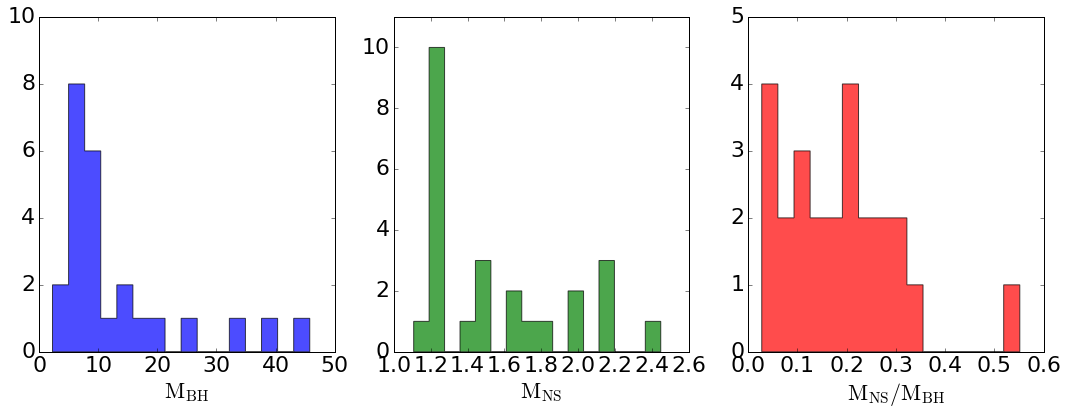

In [27]:
##Mass ratio of BH/NS in NSBH binaries
m0_nsbh=[m0_esc[1], m0_in[1], m0_coll2_nsbh]
m1_nsbh=[m1_esc[1], m1_in[1], m1_coll2_nsbh]

mbh=[]; mns=[]
for i in range(3):
    m0_temp=m0_nsbh[i]; m1_temp=m1_nsbh[i]
    mbh_temp=[]; mns_temp=[]
    for j in range(len(m0_temp)):
        if m0_temp[j]>m1_temp[j]:
            mbh_temp.append(m0_temp[j]); mns_temp.append(m1_temp[j])
        else:
            mbh_temp.append(m1_temp[j]); mns_temp.append(m0_temp[j])
    
    mbh=mbh+mbh_temp; mns=mns+mns_temp

mbh=np.array(mbh); mns=np.array(mns)
    
plt.rcParams['figure.figsize'] = [18, 6]   #15, 8
fig, (ax1, ax2, ax3)=plt.subplots(1, 3)
ax1.hist(mbh, bins=16, color='b', alpha=0.7, histtype='stepfilled')
ax2.hist(mns, bins=16, color='green', alpha=0.7, histtype='stepfilled')
ax3.hist(mns/mbh, bins=16, color='r', alpha=0.7, histtype='stepfilled')
ax1.set_ylim(0., 10.)
ax2.set_ylim(0., 11.)
ax3.set_ylim(0., 5.)
ax1.set_xlabel(r'$\rm{M_{BH}}$')
ax2.set_xlabel(r'$\rm{M_{NS}}$')
ax3.set_xlabel(r'$\rm{M_{NS}/M_{BH}}$')

plt.savefig(savepath+'newruns/plots/mbhmns_nsbh.pdf', dpi=200, bbox_inches='tight')

[ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.
  0.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.] [ 1.  1.  0.  0.  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.
  1.  1.] [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]


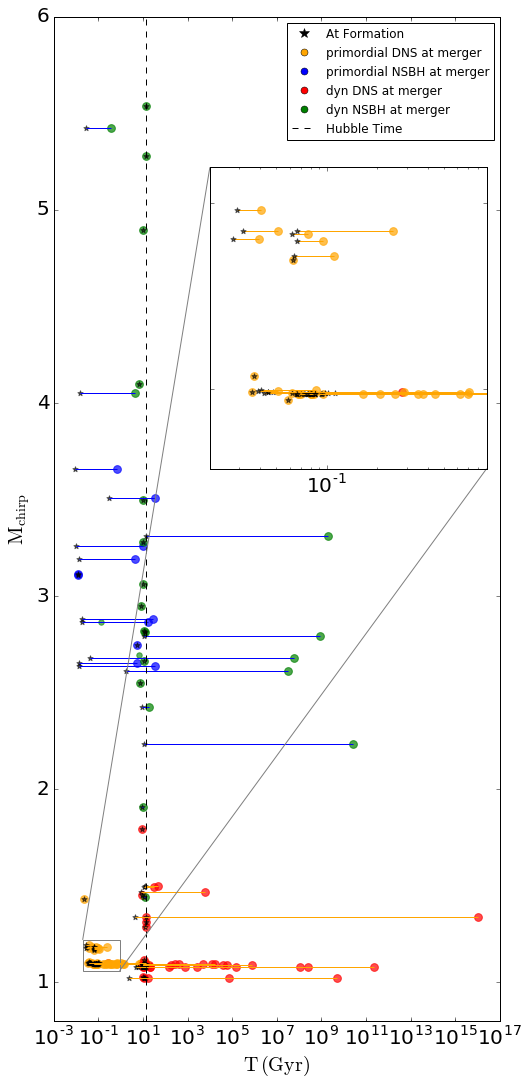

In [3]:
###Plot Chirp mass vs. Time inset
#from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,
#                                                  mark_inset)
#
###Read the data files
#esc_dns=np.genfromtxt('/projects/b1095/syr904/projects/SGRB/newruns/Esc_DNS_nondissolved.dat')
#esc_nsbh=np.genfromtxt('/projects/b1095/syr904/projects/SGRB/newruns/Esc_NSBH_nondissolved.dat')
#esc_bbh=np.genfromtxt('/projects/b1095/syr904/projects/SGRB/newruns/Esc_BBH_nondissolved.dat')
#
#gw_dns=np.genfromtxt('/projects/b1095/syr904/projects/SGRB/newruns/GWcap_DNS_nondissolved.dat')
##gw_dns=np.atleast_2d(gw_dns)
#gw_nsbh=np.genfromtxt('/projects/b1095/syr904/projects/SGRB/newruns/GWcap_NSBH_nondissolved.dat')
#gw_bbh=np.genfromtxt('/projects/b1095/syr904/projects/SGRB/newruns/GWcap_BBH_nondissolved.dat')
#
#in_dns=np.genfromtxt('/projects/b1095/syr904/projects/SGRB/newruns/Incluster_DNS_nondissolved.dat')
#in_nsbh=np.genfromtxt('/projects/b1095/syr904/projects/SGRB/newruns/Incluster_NSBH_nondissolved.dat')
#in_bbh=np.genfromtxt('/projects/b1095/syr904/projects/SGRB/newruns/Incluster_BBH_nondissolved.dat')
#
#
###Extract the data
#tform_esc_dns=np.array(esc_dns[:,10]); tform_esc_nsbh=np.array(esc_nsbh[:,10])
#tmerge_esc_dns=np.array(esc_dns[:,2])+np.array(esc_dns[:,3])
#tmerge_esc_nsbh=np.array(esc_nsbh[:,2])+np.array(esc_nsbh[:,3])
#
#m0_esc_dns=np.array(esc_dns[:,4]); m1_esc_dns=np.array(esc_dns[:,5])
#m0_esc_nsbh=np.array(esc_nsbh[:,4]); m1_esc_nsbh=np.array(esc_nsbh[:,5])
#
#
#tform_in_nsbh=np.array(in_nsbh[:,10])
#tmerge_in_nsbh=np.array(in_nsbh[:,2])
#m0_in_nsbh=np.array(in_nsbh[:,7]); m1_in_nsbh=np.array(in_nsbh[:,8])
#
#tform_in_dns=np.array(in_dns[:,10])
#tmerge_in_dns=np.array(in_dns[:,2])
#m0_in_dns=np.array(in_dns[:,7]); m1_in_dns=np.array(in_dns[:,8])
#
#
#m0_gw_dns=np.array(gw_dns[:,10]); m1_gw_dns=np.array(gw_dns[:,11])
#m2_gw_dns=np.array(gw_dns[:,12]); m3_gw_dns=np.array(gw_dns[:,13])
#m0_gw_nsbh=np.array(gw_nsbh[:,10]); m1_gw_nsbh=np.array(gw_nsbh[:,11])
#m2_gw_nsbh=np.array(gw_nsbh[:,12]); m3_gw_nsbh=np.array(gw_nsbh[:,13])
#tcoll_dns=np.array(gw_dns[:,2]); tcoll_nsbh=np.array(gw_nsbh[:,2])
#
#priflag_esc_dns=esc_dns[:,11]; priflag_esc_nsbh=esc_nsbh[:,11]
#priflag_in_dns=in_dns[:,11]; priflag_in_nsbh=in_nsbh[:,11]
#print priflag_esc_dns, priflag_esc_nsbh, priflag_in_nsbh
#
#
#
###Calculate the chirp mass
##mc_esc_dns=[]; mc_esc_nsbh=[]; mc_in_nsbh=[]; mc_gw_dns=[]; 
#mc_esc_dns=unit_convert.chirpmass(m0_esc_dns, m1_esc_dns)
#mc_esc_nsbh=unit_convert.chirpmass(m0_esc_nsbh, m1_esc_nsbh)
#
#mc_in_dns=unit_convert.chirpmass(m0_in_dns, m1_in_dns)
#mc_in_nsbh=unit_convert.chirpmass(m0_in_nsbh, m1_in_nsbh)
#
##print mc_esc_dns, mc_esc_nsbh, mc_in_nsbh
#
#mc_gw_dns=[]; tmerge_gw_dns=[]
#for m in range(len(m0_gw_dns)):
#    if m2_gw_dns[m]==-100:
#        mc_gw_dns.append(unit_convert.chirpmass(m0_gw_dns[m], m1_gw_dns[m]))
#        tmerge_gw_dns.append(tcoll_dns[m])
#      
#    
#mc_gw_nsbh=[]; tmerge_gw_nsbh=[]
#for n in range(len(m0_gw_nsbh)):
#    if m2_gw_nsbh[n]==-100:
#        mc_gw_nsbh.append(unit_convert.chirpmass(m0_gw_nsbh[n], m1_gw_nsbh[n]))
#        tmerge_gw_nsbh.append(tcoll_nsbh[n])
#
#
#
###Make signs for legends
#kstar=mlines.Line2D([], [],  linestyle = 'None', color='k', marker='*',
#                  markersize=10, label='At Formation')
#bdot=mlines.Line2D([], [],  linestyle = 'None', color='b', marker='o',
#                  markersize=7, label='primordial NSBH at merger')
#ydot=mlines.Line2D([], [],  linestyle = 'None', color='orange', marker='o',
#                  markersize=7, label='primordial DNS at merger')
#
#gdot=mlines.Line2D([], [],  linestyle = 'None', color='g', marker='o',
#                  markersize=7, label='dyn NSBH at merger')
#rdot=mlines.Line2D([], [],  linestyle = 'None', color='r', marker='o',
#                  markersize=7, label='dyn DNS at merger')
#
#bline=mlines.Line2D([], [],  linestyle = '-', color='b', label='NSBH')
#yline=mlines.Line2D([], [],  linestyle = '-', color='orange', label='DNS')
#kline=mlines.Line2D([], [],  linestyle = '--', color='k', label='Hubble Time')
#
#
#
###Plotting
#plt.rcParams['figure.figsize'] = [8, 18]   #15, 8
#fig, ax1=plt.subplots()
###Scatter plot of the points
#
#ax1.scatter(tform_esc_dns/1000., mc_esc_dns, marker='*', s=30, color='k', alpha=0.6, zorder=2)
#for i in range(len(priflag_esc_dns)):
#    if priflag_esc_dns[i]==1:
#        ax1.scatter(tmerge_esc_dns[i]/1000., mc_esc_dns[i], color='orange', s=60, alpha=0.7, zorder=1)
#    else:
#        ax1.scatter(tmerge_esc_dns[i]/1000., mc_esc_dns[i], color='r', s=60, alpha=0.7, zorder=1)
#        
#
#ax1.scatter(tform_esc_nsbh/1000., mc_esc_nsbh, marker='*', s=30, color='k', alpha=0.6, zorder=2)
#for j in range(len(priflag_esc_nsbh)):
#    if priflag_esc_nsbh[j]==1:
#        ax1.scatter(tmerge_esc_nsbh[j]/1000., mc_esc_nsbh[j], color='b', s=60, alpha=0.7, zorder=1)
#    else:
#        ax1.scatter(tmerge_esc_nsbh[j]/1000., mc_esc_nsbh[j], color='g', s=60, alpha=0.7, zorder=1)
#    
#
#ax1.scatter(tform_in_dns/1000., mc_in_dns, marker='*', s=30, color='k', alpha=0.6, zorder=2)
#for k in range(len(priflag_in_dns)):
#    if priflag_in_dns[k]==1:
#        ax1.scatter(tmerge_in_dns[k]/1000., mc_in_dns[k], color='orange', s=60, alpha=0.7, zorder=1)
#    else:
#        ax1.scatter(tmerge_in_dns[k]/1000., mc_in_dns[k], color='r', s=60, alpha=0.7, zorder=1)
#
#ax1.scatter(tform_in_nsbh/1000., mc_in_nsbh, marker='*', s=30, color='k', alpha=0.6, zorder=2)
#for l in range(len(priflag_in_nsbh)):
#    if priflag_in_nsbh[l]==1:
#        ax1.scatter(tmerge_in_nsbh[l]/1000., mc_in_nsbh[l], color='b', s=60, alpha=0.7, zorder=1)
#    else:
#        ax1.scatter(tmerge_in_nsbh[l]/1000., mc_in_nsbh[l], color='g', s=60, alpha=0.7, zorder=1)
#
#
#ax1.scatter(np.array(tmerge_gw_dns)/1000., mc_gw_dns, s=30, color='red', alpha=0.6)
#ax1.scatter(np.array(tmerge_gw_nsbh)/1000., mc_gw_nsbh, s=30, color='green', alpha=0.6)
#
#ax1.hlines(mc_esc_dns, xmin=tform_esc_dns/1000., xmax=tmerge_esc_dns/1000., colors='orange')
#ax1.hlines(mc_in_dns, xmin=tform_in_dns/1000., xmax=tmerge_in_dns/1000., colors='orange')
#ax1.hlines(mc_esc_nsbh, xmin=tform_esc_nsbh/1000., xmax=tmerge_esc_nsbh/1000., colors='b')
#ax1.hlines(mc_in_nsbh, xmin=tform_in_nsbh/1000., xmax=tmerge_in_nsbh/1000., colors='b')
#
#ax1.axvline(14., ls='--', color='k')
#
#ax1.set_xlabel(r'$\rm{T\, (Gyr)}$')
#ax1.set_ylabel(r'$\rm{M_{chirp}}$')
##plt.xlim(0.0005, 10**17)
#ax1.set_ylim(0.8, 6.0)
#ax1.set_xscale('log')
##plt.yscale('log')
#ax1.legend(handles=[kstar, ydot, bdot, rdot, gdot, kline], loc='upper right', prop={'size': 12}, numpoints=1, frameon=True)
#
#
## Create a set of inset Axes: these should fill the bounding box allocated to them.
#ax2 = plt.axes([5, 5, 1, 1], axisbg='none')
#
# Manually set the position and relative size of the inset axes within ax1
#ip = InsetPosition(ax1, [0.35,0.55,0.62,0.3])   #0.28,0.6,0.45,0.3, 
#ax2.set_axes_locator(ip)
## Mark the region corresponding to the inset axes on ax1 and draw lines
## in grey linking the two axes.
#mark_inset(ax1, ax2, loc1=2, loc2=4, fc="none", ec='0.5')
#
#mc_dns_max=1.2; tmerge_dns_max=14000.
#
#ax2.scatter(np.array(tmerge_gw_dns)/1000., mc_gw_dns, s=30, color='orange', alpha=0.6)
#
##ax2.scatter(tform_in_dns/1000., mc_in_dns, marker='*', s=30, color='k', alpha=0.6, zorder=2)
#for o in range(len(priflag_in_dns)):
#    #print tmerge_in_dns[o], mc_in_dns[o]
#    if tmerge_in_dns[o]<=tmerge_dns_max and mc_in_dns[o]<=mc_dns_max:
#        ax2.hlines(mc_in_dns[o], xmin=tform_in_dns[o]/1000., xmax=tmerge_in_dns[o]/1000., colors='orange')
#        #print 'yes'
#        ax2.scatter(tform_in_dns[o]/1000., mc_in_dns[o], marker='*', s=30, color='k', alpha=0.6, zorder=2)
#        if priflag_in_dns[o]==1:
#            ax2.scatter(tmerge_in_dns[o]/1000., mc_in_dns[o], color='orange', s=60, alpha=0.7, zorder=1)
#        else:
#            ax2.scatter(tmerge_in_dns[o]/1000., mc_in_dns[o], color='r', s=60, alpha=0.7, zorder=1)
#
##ax2.scatter(tform_esc_dns/1000., mc_esc_dns, marker='*', s=30, color='k', alpha=0.6, zorder=2)
#for p in range(len(priflag_esc_dns)):
#    #print tmerge_esc_dns[p], mc_esc_dns[p]
#    if tmerge_esc_dns[p]<=tmerge_dns_max and mc_esc_dns[p]<=mc_dns_max:
#        ax2.hlines(mc_esc_dns[p], xmin=tform_esc_dns[p]/1000., xmax=tmerge_esc_dns[p]/1000., colors='orange')
#        #print 'yes'
#        ax2.scatter(tform_esc_dns[p]/1000., mc_esc_dns[p], marker='*', s=30, color='k', alpha=0.6, zorder=2)
#        if priflag_esc_dns[p]==1:
#            ax2.scatter(tmerge_esc_dns[p]/1000., mc_esc_dns[p], color='orange', s=60, alpha=0.7, zorder=1)
#        else:
#            ax2.scatter(tmerge_esc_dns[p]/1000., mc_esc_dns[p], color='r', s=60, alpha=0.7, zorder=1)
#            
#
#            
#
#ax2.set_xscale('log')
#ax2.set_yscale('log')
#ax2.set_xlim(0.02, 0.9)
#ax2.set_ylim(1.06, 1.22)
#plt.setp(ax2, xticks=[0.1], yticks=[1.1,1.2])
#
#
##plt.savefig(savepath+'newruns/plots/chirp_mass_presentation.pdf', dpi=300, bbox_inches='tight')

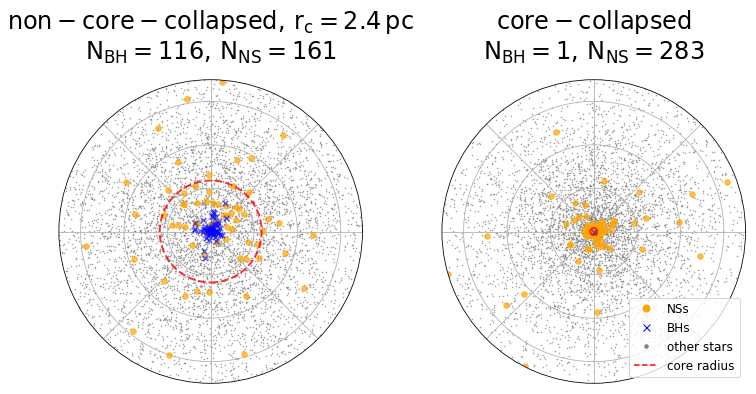

In [29]:
##Plot 2D radius distribution of all stars from 2Dproj file
#from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,
                                                 # mark_inset)
    
data2Dproj_std=np.genfromtxt('/projects/b1091/CMC_Grid_March2019/rundir/rv2/rg8/z0.002/8e5/initial.snap0280.2Dproj.dat.gz')
data2Dproj_cc=np.genfromtxt('/projects/b1091/CMC_Grid_March2019/rundir/rv0.5/rg8/z0.002/8e5/initial.snap0480.2Dproj.dat.gz')

r2D_std=data2Dproj_std[:,0]  ##in pc
binflag_std=data2Dproj_std[:,2]; ktype_std=data2Dproj_std[:,3]
k0_std=data2Dproj_std[:,5]; k1_std=data2Dproj_std[:,6]

r2D_cc=data2Dproj_cc[:,0]  ##in pc
binflag_cc=data2Dproj_cc[:,2]; ktype_cc=data2Dproj_cc[:,3]
k0_cc=data2Dproj_cc[:,5]; k1_cc=data2Dproj_cc[:,6]

rc_std=2.35; rhl_ztd=4.45
rc_cc=0.16; rhl_cc=1.55

twopi=2*np.pi

##Make signs for legends
bdot=mlines.Line2D([], [],  linestyle = 'None', color='b', marker='x',
                  markersize=7, label='BHs')
ydot=mlines.Line2D([], [],  linestyle = 'None', color='orange', marker='o',
                  markersize=7, label='NSs')
kdot=mlines.Line2D([], [],  linestyle = 'None', color='grey', marker='.',
                  markersize=7, label='other stars')
rline=mlines.Line2D([], [],  linestyle = '--', color='r', label='core radius')


plt.rcParams['figure.figsize'] = [11, 6]
fig = plt.figure()
ax1 = fig.add_subplot(121, polar=True)
ax2 = fig.add_subplot(122, polar=True)


circle1 = plt.Circle((0.0, 0.0), rc_std, transform=ax1.transData._b, color="r", fill=False, ls='--', lw=2., alpha=0.8, zorder=4)
ax1.add_artist(circle1)
circle2 = plt.Circle((0.0, 0.0), rc_cc, transform=ax2.transData._b, color="r", fill=False, lw=2., alpha=0.8, zorder=4)
ax2.add_artist(circle2)

for i in range(0, 500000, 2):
    theta=random.uniform(0, twopi)
    if binflag_std[i]==1:
        if k0_std[i]==14 or k1_std[i]==14:
            ax1.scatter(theta, r2D_std[i], color='b', s=30, alpha=0.6, marker='x', zorder=3)
        if k0_std[i]==13 or k1_std[i]==13:
            ax1.scatter(theta, r2D_std[i], color='orange', s=30, alpha=0.7, zorder=2)
        
    else:
        if ktype_std[i]==14:
            ax1.scatter(theta, r2D_std[i], color='b', s=30, alpha=0.6, marker='x', zorder=3)
        if ktype_std[i]==13:
            ax1.scatter(theta, r2D_std[i], color='orange', s=30, alpha=0.7, zorder=2)
            
    
    if binflag_cc[i]==1:
        if k0_cc[i]==14 or k1_cc[i]==14:
            ax2.scatter(theta, r2D_cc[i], color='b', s=30, alpha=0.6, marker='x', zorder=3)
        if k0_cc[i]==13 or k1_cc[i]==13:
            ax2.scatter(theta, r2D_cc[i], color='orange', s=30, alpha=0.7, zorder=2)
        
    else:
        if ktype_cc[i]==14:
            ax2.scatter(theta, r2D_cc[i], color='b', s=30, alpha=0.6, marker='x', zorder=3)
        if ktype_cc[i]==13:
            ax2.scatter(theta, r2D_cc[i], color='orange', s=30, alpha=0.7, zorder=2)
            
            
        
for j in range(0, 500000, 80):
    theta=random.uniform(0, twopi)
    if binflag_std[j]==1:
        if k0_std[j]!=14 and k1_std[j]!=14 and k0_std[j]!=13 and k1_std[j]!=13:
            ax1.scatter(theta, r2D_std[j], marker='.', color='grey', s=1., zorder=1, alpha=0.8)
    else:
         if ktype_std[j]!=14 and ktype_std[j]!=13:
            ax1.scatter(theta, r2D_std[j], marker='.', color='grey', s=1., zorder=1, alpha=0.8)
            
            
    if binflag_cc[j]==1:
        if k0_cc[j]!=14 and k1_cc[j]!=14 and k0_cc[j]!=13 and k1_cc[j]!=13:
            ax2.scatter(theta, r2D_cc[j], marker='.', color='grey', s=1., zorder=1, alpha=0.8)
    else:
         if ktype_cc[j]!=14 and ktype_cc[j]!=13:
            ax2.scatter(theta, r2D_cc[j], marker='.', color='grey', s=1., zorder=1, alpha=0.8)
    
    
            
    #print i
    
#ax2.set_rscale('log')
#ax.set_yscale('symlog')
ax1.set_rlim(0.0, 7.0)
ax2.set_rlim(0.0, 7.0)
#ax.set_ylim(-0.6, 0.6)
ax1.set_xticklabels(['', '', '', '', '', '', '', ''])
ax2.set_xticklabels(['', '', '', '', '', '', '', ''])
ax1.set_yticklabels([])
ax2.set_yticklabels([])

ax2.legend(handles=[ydot, bdot, kdot, rline], loc='lower right', prop={'size': 12}, numpoints=1, frameon=True)

ax1.set_title(r'$\rm{non-core-collapsed,\,r_c=2.4\,pc}$'+'\n'+r'$\rm{N_{BH}=116,\,N_{NS}=161}$', fontsize=24)
ax2.set_title(r'$\rm{core-collapsed}$'+'\n'+r'$\rm{N_{BH}=1,\,N_{NS}=283}$', fontsize=24)


# Create a set of inset Axes: these should fill the bounding box allocated to them.
#ax11 = plt.axes(axisbg='none', polar=True, anchor=[1,1])
#ax22 = plt.axes(axisbg='none', polar=True, anchor=[1,1])


# Manually set the position and relative size of the inset axes within ax1
#ip1 = InsetPosition(ax1, [0.35,0.55,0.62,0.3])   #0.28,0.6,0.45,0.3, 
#ip2 = InsetPosition(ax2, [0.35,0.55,0.62,0.3])

#ax11.set_axes_locator(ip1)
#ax22.set_axes_locator(ip2)

# Mark the region corresponding to the inset axes on ax1 and draw lines
# in grey linking the two axes.
#mark_inset(ax1, ax11, loc1=1, loc2=4, fc="none", ec='0.5')
#mark_inset(ax2, ax22, loc1=1, loc2=4, fc="none", ec='0.5')

plt.subplots_adjust(wspace=0)
fig.tight_layout()
plt.savefig(savepath+'newruns/plots/2Dproj_v5.pdf')


0.017382 0.111331
0.0850945 4.780581


/software/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


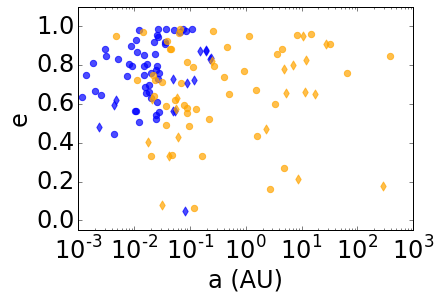

In [5]:
##Plot the eccentricity and semimajor axis of escaped systems

esc2=[esc_dns, esc_nsbh]

a_dyn2=[]; a_pri2=[]
e_dyn2=[]; e_pri2=[]
for i in range(2):
    a_dyn2.append([]); a_pri2.append([])
    e_dyn2.append([]); e_pri2.append([])
    esc_flag=esc2[i][:,11]; a=esc2[i][:,8]; e=esc2[i][:,9]
    for j in range(len(esc_flag)):
        if esc_flag[j]==1:
            a_pri2[i].append(a[j]); e_pri2[i].append(e[j])
        else:
            a_dyn2[i].append(a[j]); e_dyn2[i].append(e[j])

            
plt.figure()
shapes=['o', 'd']
for k in range(2):
    plt.scatter(a_pri2[k], e_pri2[k], color='b', marker=shapes[k], alpha=0.7, s=40)
    plt.scatter(a_dyn2[k], e_dyn2[k], color='orange', marker=shapes[k], alpha=0.7, s=40)
    print np.median(a_pri2[k]), np.median(a_dyn2[k])
    
plt.xscale('log')
plt.xlabel('a (AU)')
plt.ylabel('e')
plt.ylim(-0.05, 1.1)
plt.legend(loc='best')

0.021523525 25.5403297
0.020091325 5.527838425


/software/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


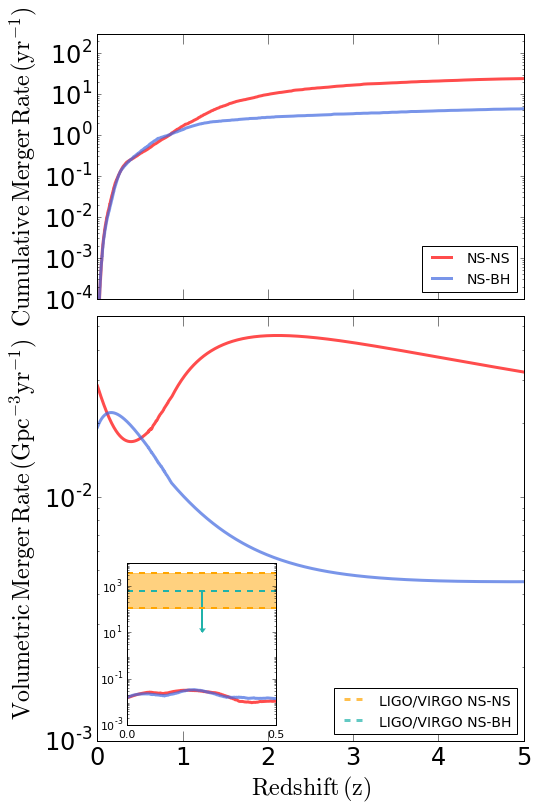

In [8]:
##Merger Rates
from scipy.signal import savgol_filter
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition, mark_inset)
#from matplotlib.axes.Axes import indicate_inset_zoom
from matplotlib import ticker
from matplotlib.ticker import FormatStrFormatter


dns_main=np.genfromtxt('/projects/b1095/syr904/projects/SGRB/newruns/finaldata/rates_dns_maingrid_rho0.77_500draw.dat')
nsbh_main=np.genfromtxt('/projects/b1095/syr904/projects/SGRB/newruns/finaldata/rates_nsbh_maingrid_rho0.77_500draw.dat')

dns_extreme=np.genfromtxt('/projects/b1095/syr904/projects/SGRB/newruns/finaldata/extreme_model/rates_dns_extreme_rho2.31_500draw.dat')
nsbh_extreme=np.genfromtxt('/projects/b1095/syr904/projects/SGRB/newruns/finaldata/extreme_model/rates_nsbh_extreme_rho2.31_500draw.dat')

main_all=[dns_main, nsbh_main]
extreme_all=[dns_extreme, nsbh_extreme]

rates_main=[]; rateden_main=[]; zmid_main=[]
rates_extreme=[]; rateden_extreme=[]; zmid_extreme=[]
for i in range(2):
    rates_main.append([]); rateden_main.append([]); zmid_main.append([])
    rates_extreme.append([]); rateden_extreme.append([]); zmid_extreme.append([])
    
    rates_main[i]=main_all[i][:,0]; rateden_main[i]=main_all[i][:,1]; zmid_main[i]=main_all[i][:,2]
    rates_extreme[i]=extreme_all[i][:,0]; rateden_extreme[i]=extreme_all[i][:,1]; zmid_extreme[i]=extreme_all[i][:,2]
    
    maintot=[]
    for k in range(len(zmid_main[i])):
        if zmid_main[i][k]<=0.1:
            maintot.append(rateden_main[i][k])
            
    extremetot=[]
    for k in range(len(zmid_extreme[i])):
        if zmid_extreme[i][k]<=0.1:
            extremetot.append(rateden_extreme[i][k])
            
    print np.mean(maintot), np.mean(extremetot)
    
    #print np.mean(rateden_main[i]), np.mean(rateden_extreme[i])
    

rcumu_main=np.cumsum(rates_main, axis=1); rcumu_extreme=np.cumsum(rates_extreme, axis=1)

#print rcumu_main#, zmid_main, rateden_main

plt.rcParams['figure.figsize'] = [8, 12]   #15, 8
bline=mlines.Line2D([], [],  linestyle = '-', lw=3.0, color='royalblue', label='NS-BH', alpha=0.7)
rline=mlines.Line2D([], [],  linestyle = '-', lw=3.0, color='red', label='NS-NS', alpha=0.7)
odash=mlines.Line2D([], [],  linestyle = '--', lw=3.0, color='orange', label='LIGO/VIRGO NS-NS', alpha=0.7)
gdash=mlines.Line2D([], [],  linestyle = '--', lw=3.0, color='lightseagreen', label='LIGO/VIRGO NS-BH', alpha=0.7)


fig, (ax1, ax2)=plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [1,1.6]})
cs=['red', 'royalblue']
labels=['DNS', 'NSBH']
for j in range(2):
    ax1.plot(zmid_main[j], rcumu_main[j], color=cs[j], lw=3., alpha=0.7)
    #ax1.plot(zmid_extreme[j], rcumu_extreme[j], color=cs[j], lw=3., ls='--', alpha=0.7)
    
    yhat_main = savgol_filter(rateden_main[j], 351, 3)
    yhat_extreme = savgol_filter(rateden_extreme[j], 351, 3)
    ax2.plot(zmid_main[j], yhat_main, color=cs[j], lw=3., alpha=0.7)
    #ax2.plot(zmid_extreme[j], yhat_extreme, color=cs[j], lw=3., ls='--', alpha=0.7)
    
    #print zmid_main[j][0], rateden_main[j][0]

    

##Adding the LIGO merger rates to the figure
dns_ligo_low= 110.   ## Gpc−3y−1
dns_ligo_high= 3840.   ##Gpc−3y−1
dns_ligo_mid= (dns_ligo_high+dns_ligo_low)/2.
nsbh_ligo_high = 610  ##Gpc−3y−1

x=np.linspace(0, 7, 20)
#ax2.axhline(dns_ligo_low, ls='--', lw=2, color='orange')
#ax2.axhline(dns_ligo_high, ls='--', lw=2, color='orange')
##ax2.axhline(dns_ligo_mid, color='k')
#ax2.fill_between(x, dns_ligo_low, dns_ligo_high, color='orange', alpha=0.5)
#ax2.axhline(nsbh_ligo_high, ls='--', lw=2, color='lightseagreen')
#ax2.errorbar(2.5, nsbh_ligo_high, yerr=5.7e2, uplims=True, color='lightseagreen', lw=2)


## Create a set of inset Axes: these should fill the bounding box allocated to them.
axins = inset_axes(ax2, width=0.5, height=0.9)
# Manually set the position and relative size of the inset axes within ax1
ip = InsetPosition(ax2, [0.07, 0.038, 0.35, 0.38])   #0.28,0.6,0.45,0.3, 
axins.set_axes_locator(ip)
# Mark the region corresponding to the inset axes on ax1 and draw lines
# in grey linking the two axes.
#mark_inset(ax2, ax3, loc1=1, loc2=2, fc="none", ec='0.5')
yhat_main1=savgol_filter(rateden_main[0], 51, 3)
yhat_main2=savgol_filter(rateden_main[1], 51, 3)
axins.plot(zmid_main[0], yhat_main1, color=cs[0], lw=3., alpha=0.7)
axins.plot(zmid_main[1], yhat_main2, color=cs[1], lw=3., alpha=0.7)
axins.axhline(dns_ligo_low, ls='--', lw=2, color='orange')
axins.axhline(dns_ligo_high, ls='--', lw=2, color='orange')
axins.fill_between(x, dns_ligo_low, dns_ligo_high, color='orange', alpha=0.5)
axins.axhline(nsbh_ligo_high, ls='--', lw=2, color='lightseagreen')
axins.errorbar(0.25, nsbh_ligo_high, yerr=6e2, uplims=True, color='lightseagreen', lw=2)
axins.set_yscale('log')
axins.set_xlim(0.0, 0.5)
axins.set_ylim(1e-3, 1e4)
plt.setp(axins, xticks=[0.0, 0.5])
axins.locator_params(axis='y', numticks=5)
axins.tick_params(axis='both', which='major', labelsize=11)
    
ax1.set_yscale('log')
ax2.set_yscale('log')
ax1.set_xlim(0.0, 5.0)
ax2.set_xlim(0.0, 5.0)
ax1.set_ylim(1e-4, 3e2)
ax2.set_ylim(1e-3, 5.5e-2)
ax1.locator_params(axis='y', numticks=7)
ax2.locator_params(axis='y', numticks=6)
#ax2.yaxis.set_minor_formatter(FormatStrFormatter("%g"))
#ax2.yaxis.set_minor_locator(ticker.LogLocator(base=10.0))

ax1.set_ylabel(r'$\rm{Cumulative\, Merger\, Rate\,(yr^{-1})}$')
ax2.set_ylabel(r'$\rm{Volumetric\, Merger\, Rate\,(Gpc^{-3}yr^{-1})}$')
ax2.set_xlabel(r'$\rm{Redshift\,(z)}$')

ax1.legend(handles=[rline, bline], loc='lower right', prop={'size': 14}, frameon=True)
ax2.legend(handles=[odash, gdash], loc='lower right', prop={'size': 14}, frameon=True)

ax1.tick_params(axis='x', length=10, which='major')
ax1.tick_params(axis='x', length=5, which='minor')
ax2.tick_params(axis='x', length=10, which='major')
ax2.tick_params(axis='x', length=5, which='minor')


fig.tight_layout()
plt.subplots_adjust(hspace=0.05)


#plt.savefig(savepath+'newruns/plots/rates_ligo_inset_v5.pdf', dpi=300)

0.055706875 0.006700425
0.054535 0.004837575


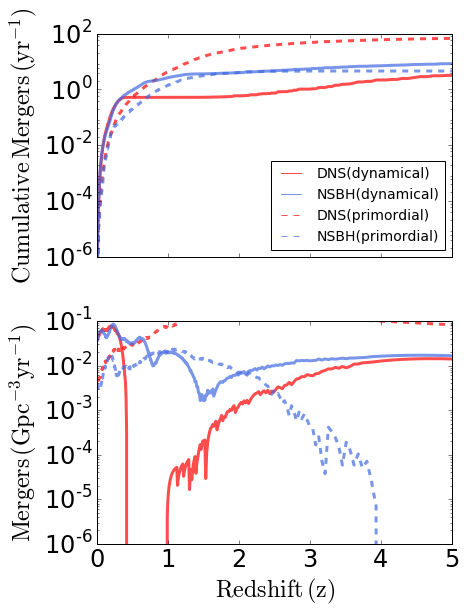

In [61]:
##Merger Rates
from scipy.signal import savgol_filter

dns_dyn=np.genfromtxt('/projects/b1095/syr904/projects/SGRB/newruns/finaldata/rates_dns_dyn_rho2.31_500draw.dat')
nsbh_dyn=np.genfromtxt('/projects/b1095/syr904/projects/SGRB/newruns/finaldata/rates_nsbh_dyn_rho2.31_500draw.dat')

dns_pri=np.genfromtxt('/projects/b1095/syr904/projects/SGRB/newruns/finaldata/rates_dns_pri_rho2.31_500draw.dat')
nsbh_pri=np.genfromtxt('/projects/b1095/syr904/projects/SGRB/newruns/finaldata/rates_nsbh_pri_rho2.31_500draw.dat')

dyn_all=[dns_dyn, nsbh_dyn]
pri_all=[dns_pri, nsbh_pri]

rates_dyn=[]; rateden_dyn=[]; zmid_dyn=[]
rates_pri=[]; rateden_pri=[]; zmid_pri=[]
for i in range(2):
    rates_dyn.append([]); rateden_dyn.append([]); zmid_dyn.append([])
    rates_pri.append([]); rateden_pri.append([]); zmid_pri.append([])
    
    rates_dyn[i]=dyn_all[i][:,0]; rateden_dyn[i]=dyn_all[i][:,1]; zmid_dyn[i]=dyn_all[i][:,2]
    rates_pri[i]=pri_all[i][:,0]; rateden_pri[i]=pri_all[i][:,1]; zmid_pri[i]=pri_all[i][:,2]
    
    #print np.mean(np.add(rates_dyn[i], rates_pri[i]))
    
    dyntot=[]; pritot=[]
    for k in range(len(zmid_dyn[i])):
        if zmid_dyn[i][k]<=0.1:
            dyntot.append(rateden_dyn[i][k]); pritot.append(rateden_pri[i][k])
    
    print np.mean(dyntot), np.mean(pritot)
            
        
rcumu_dyn=np.cumsum(rates_dyn, axis=1); rcumu_pri=np.cumsum(rates_pri, axis=1)

#print rcumu_main#, zmid_main, rateden_main

plt.rcParams['figure.figsize'] = [7, 9]   #15, 8
bline=mlines.Line2D([], [],  linestyle = '-', color='royalblue', label='NSBH(dynamical)', alpha=0.7)
rline=mlines.Line2D([], [],  linestyle = '-', color='red', label='DNS(dynamical)', alpha=0.7)
bdash=mlines.Line2D([], [],  linestyle = '--', color='royalblue', label='NSBH(primordial)', alpha=0.7)
rdash=mlines.Line2D([], [],  linestyle = '--', color='red', label='DNS(primordial)', alpha=0.7)


fig, (ax1, ax2)=plt.subplots(2, 1, sharex=True)
cs=['red', 'royalblue']
for j in range(2):
    ax1.plot(zmid_dyn[j], rcumu_dyn[j], color=cs[j], lw=3., alpha=0.7)
    ax1.plot(zmid_pri[j], rcumu_pri[j], color=cs[j], lw=3., ls='--', alpha=0.7)
    
    yhat_dyn = savgol_filter(rateden_dyn[j], 51, 3)
    yhat_pri = savgol_filter(rateden_pri[j], 51, 3)
    ax2.plot(zmid_dyn[j], yhat_dyn, color=cs[j], lw=3., alpha=0.7)
    ax2.plot(zmid_pri[j], yhat_pri, color=cs[j], lw=3., ls='--', alpha=0.7)
    
    #print zmid_dyn[j][0], rateden_dyn[j][0], zmid_pri[j][0], rateden_pri[j][0]

    
ax1.set_yscale('log')
ax2.set_yscale('log')
ax1.set_xlim(0.0, 5.0)
ax2.set_xlim(0.0, 5.0)
ax2.set_ylim(1e-6, 1e-1)
ax1.locator_params(axis='y', numticks=7)

ax1.set_ylabel(r'$\rm{Cumulative\,Mergers\,(yr^{-1})}$')
ax2.set_ylabel(r'$\rm{Mergers\,(Gpc^{-3}yr^{-1})}$')
ax2.set_xlabel(r'$\rm{Redshift\,(z)}$')

ax1.legend(handles=[rline, bline, rdash, bdash], loc='lower right', prop={'size': 14}, frameon=True)
fig.tight_layout()

#plt.savefig(savepath+'newruns/plots/rates_dyn_pri.pdf', dpi=300)

76


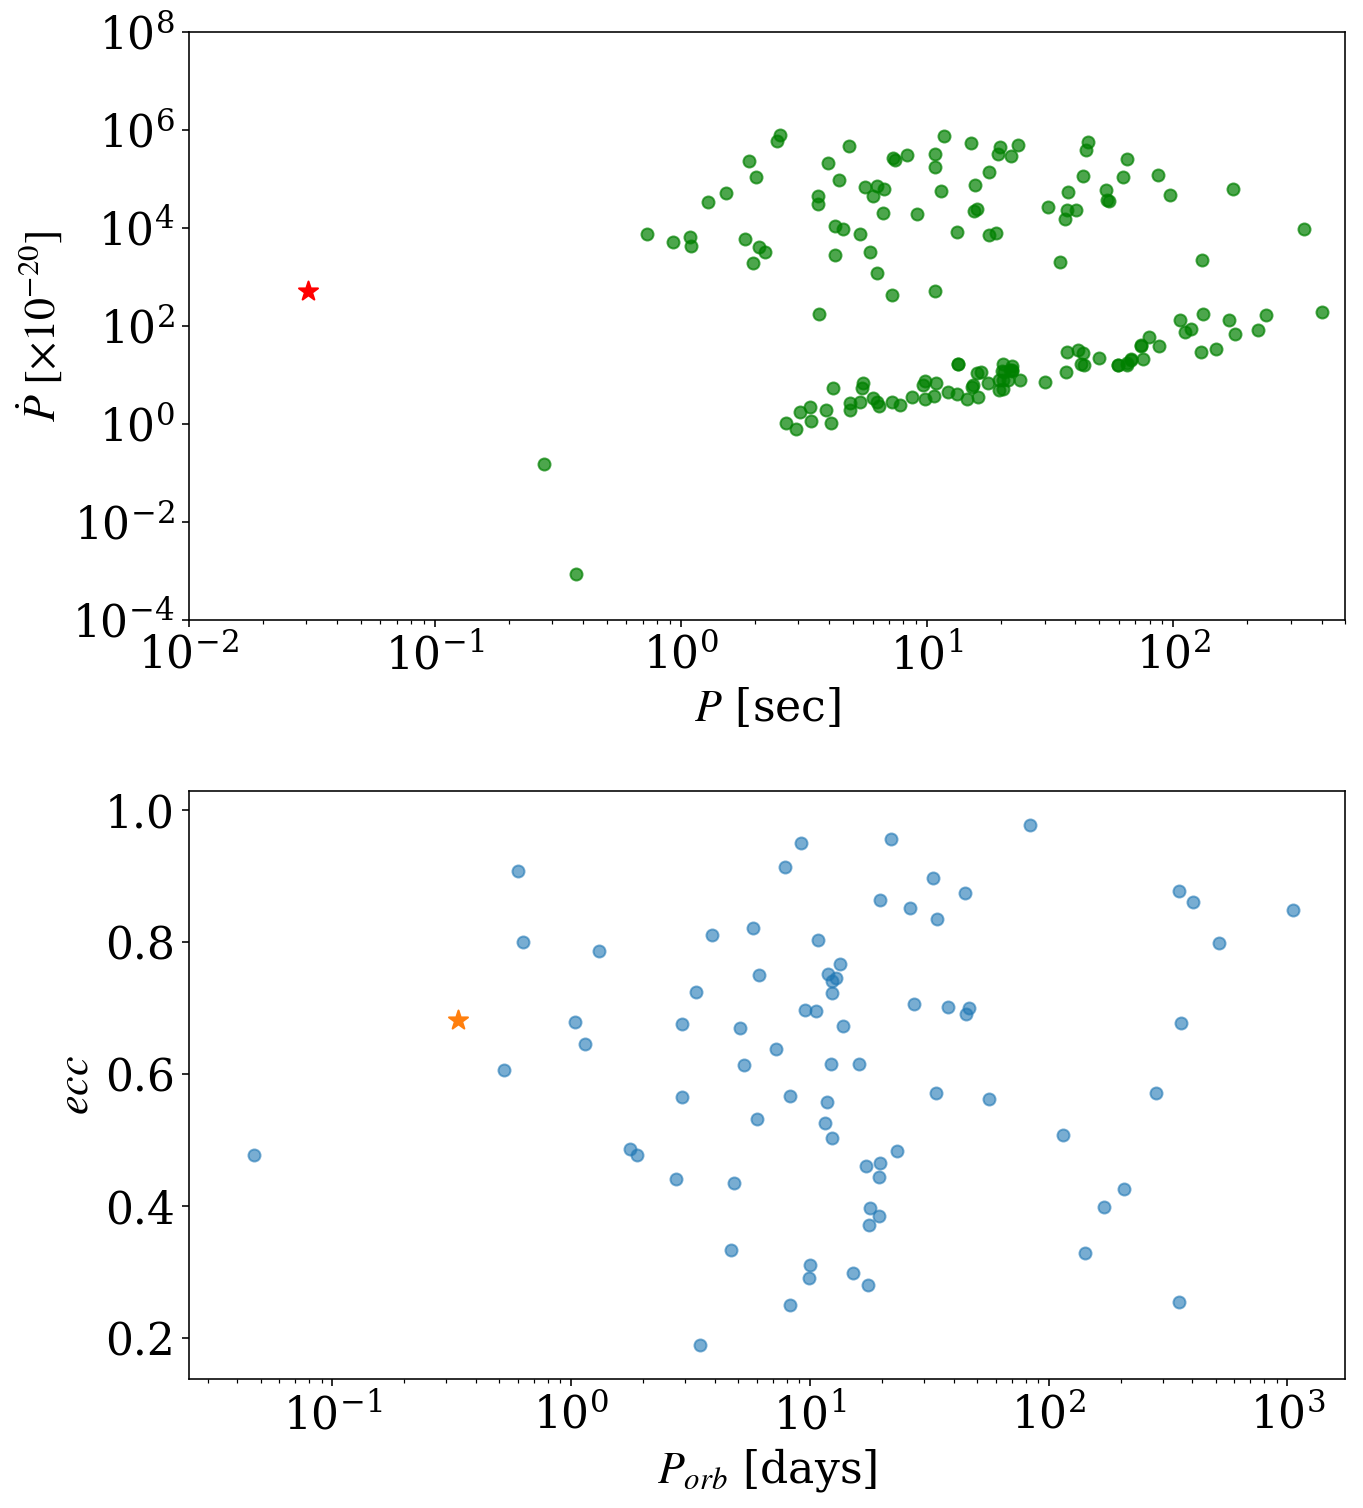

In [36]:
###Present day DNS
alldns = np.genfromtxt('/projects/b1095/syr904/projects/SGRB/newruns/finaldata/DNS_NSBH_Unique_9to12Gyr_maingrid.dat')
model_status = alldns[:,13]; types = alldns[:,12]
P0 = alldns[:,4][(model_status==1) & (types==1313)]; P1 = alldns[:,5][(model_status==1) & (types==1313)]
B0 = alldns[:,6][(model_status==1) & (types==1313)]; B1 = alldns[:,7][(model_status==1) & (types==1313)]
SMA = alldns[:,10][(model_status==1) & (types==1313)]; ECC = alldns[:,11][(model_status==1) & (types==1313)]
M0 = alldns[:,8][(model_status==1) & (types==1313)]; M1 = alldns[:,9][(model_status==1) & (types==1313)]
Pdot0 = Kconst*yearsc*B0*B0/P0*10**20
Pdot1 = Kconst*yearsc*B1*B1/P1*10**20
Porb = uc.au_to_period(SMA, M0, M1)
print(len(SMA))

fig, axs = plt.subplots(nrows = 2, figsize=(10, 11))
axs[0].scatter(P0, Pdot0, color='green', alpha=0.7)
axs[0].scatter(P1, Pdot1, color='green', alpha=0.7)
axs[0].scatter(0.0305293, 499.1, marker='*', s=100, color='r')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_xlabel(r'$P$ [sec]')
axs[0].set_ylabel(r'$\dot{P}\ [\times 10^{-20}]$')
axs[0].set_xlim(xmin=0.01, xmax=500)
axs[0].set_ylim(ymin=0.0001, ymax=10**8)

axs[1].scatter(Porb, ECC, alpha=0.6)
axs[1].scatter(0.33528,0.681386, marker='*', s=100)
axs[1].set_xlabel(r'$P_{orb}$ [days]')
axs[1].set_ylabel(r'$ecc$')
axs[1].set_xscale('log')

fig.tight_layout()